#### Exploratory Data Analysis 

In [2179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2180]:
plt.rc("font", size=12)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [2181]:
data = pd.read_csv("cpd.csv")
print(data.shape)

(650, 74)


In [2182]:
data['conversion1'].describe( )
data['conversion1'] = data['conversion3']

In [2183]:
print(data.columns)

Index(['Timestamp', '4. ', 'Study ID No.', '6. How old are you? ',
       '7. What is your current job?', 'job type', 'What level? ',
       '8. What is your highest educational attainment? ', 'educ', '9. Sex ',
       'female', '10. Gender Identification ', 'genderid',
       '11. Location (Region) ', 'loc',
       '12. What device(s) are you using to access the social media?',
       'devices', 'devices2',
       '13. What led you in visiting the page? (Choose one)', 'purpose page',
       '14. What is your priority reproductive health need right now? ',
       'perceived rh needs',
       '15. What do you think are the benefits of using family planning?',
       'benefitnum1', 'benefitnum', '16. What platform(s) did you visit? ',
       'platforms1', 'platforms',
       '17. How often do you visit Family Planning and Reproductive Health social media contents? ',
       'oftenvisit',
       '18. How did you learn about CPD and Usap Tayo sa Family Planning FB pages? ',
       'learnpa

In [2184]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = pd.DataFrame()

### Touchpoint 1

#### Demographics

##### Remove rows with no conversion 1 results

In [2185]:
print(data.shape)

data = data.dropna(subset=['What facility? '])
data = data[data['What facility? '] == 'Private clinic (Pribadong klinika)']#
data = data.dropna(subset=['conversion3'])
print(data.shape)
cdata1 = pd.DataFrame()     # Dataframe for conversion 1

(650, 74)
(113, 74)


Total respondents at the first conversion: **518**

##### Add only the demographics parameters

In [2186]:
cdata1['conversion1'] = data['conversion1']
cdata1['age'] = data['6. How old are you? ']
cdata1['job_type'] = data['job type']
cdata1['educ'] = data['educ']
cdata1['sex'] = data['female']
cdata1['genderid'] = data['genderid']
cdata1['loc'] = data['loc']
cdata1['devices'] = data['devices']

Visualize correlogram

<Figure size 1000x1000 with 0 Axes>

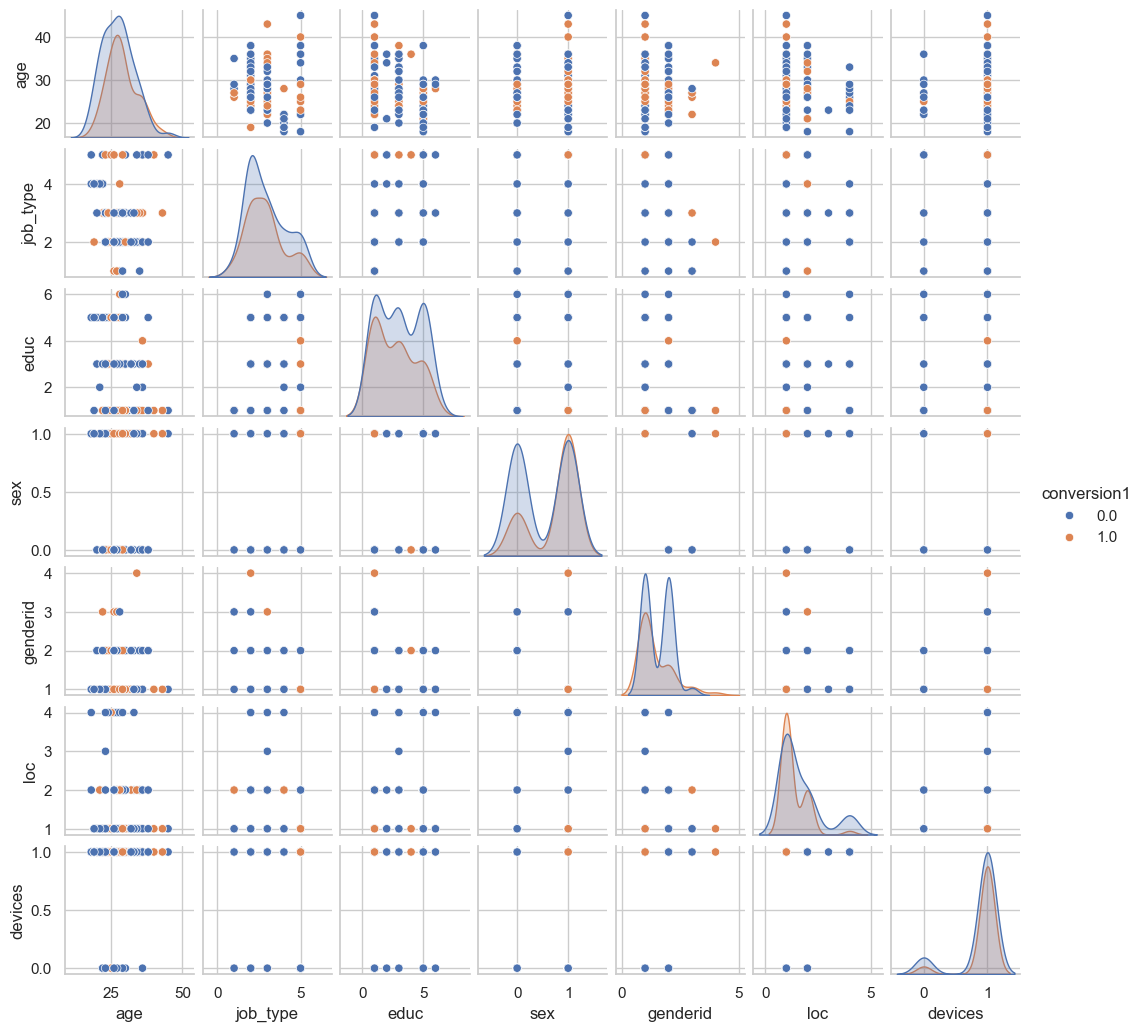

In [2187]:
plt.figure(figsize=(10,10))
sns.pairplot(cdata1, hue='conversion1', height=1.5)
plt.show()

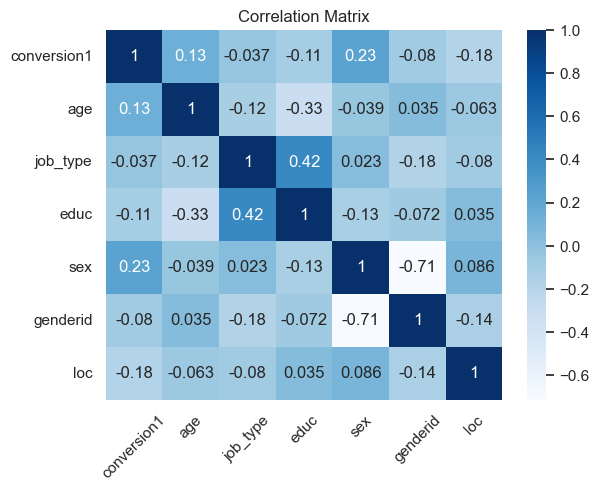

In [2188]:
corr_matrix = cdata1.iloc[:,:7].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

##### Investigate missing values and uniqueness

Text(0.5, 1.0, 'Missing values heatmap')

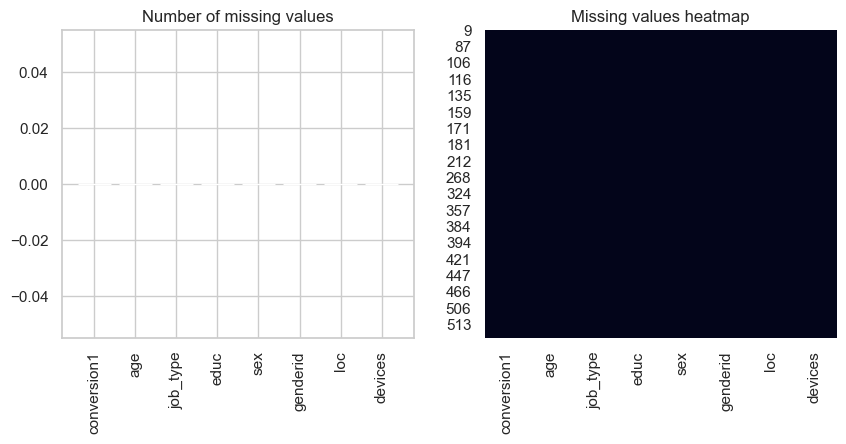

In [2189]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(cdata1.columns.values, cdata1.isnull().sum())
plt.xticks(rotation=90)
plt.title("Number of missing values")
plt.subplot(122)
sns.heatmap(cdata1.isnull(), cbar = False).set_title("Missing values heatmap")

In [2190]:
N_val = cdata1.nunique()
print(N_val)

conversion1     2
age            23
job_type        5
educ            6
sex             2
genderid        4
loc             4
devices         2
dtype: int64


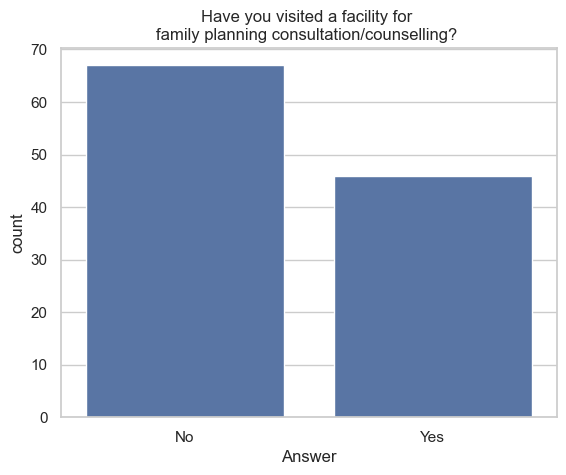

No - 67
Yes - 46


In [2191]:
labels = ['No','Yes']
bins =[0,1,99]
temp['conversion1'] = pd.cut(data['conversion1'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion1', data=temp)
plt.title(label='Have you visited a facility for \nfamily planning consultation/counselling? ')
plt.xlabel("Answer")
plt.show()

print("No - " + str (((temp['conversion1'] == 'No')).sum() ))
print("Yes - " + str (((temp['conversion1'] == 'Yes')).sum() ))
cdata1['conversion1'] = temp['conversion1']


##### Age

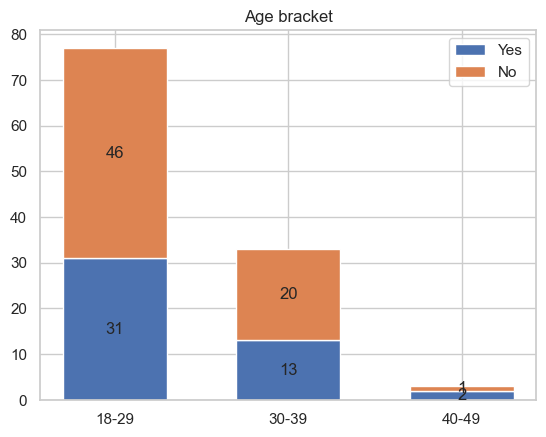

18-29 - 77
30-39 - 33
40-49 - 3


In [2192]:
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=new_age_labels, right=False)

a = ((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29) & (data['conversion1'] >= 1) ).sum()
b = ((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29) & (data['conversion1'] < 1) ).sum()
c = ((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39) & (data['conversion1'] >= 1) ).sum()
d = ((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39) & (data['conversion1'] < 1) ).sum()
e = ((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49) & (data['conversion1'] >= 1) ).sum()
f = ((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49) & (data['conversion1'] < 1) ).sum()

label1 = {
    'Yes' : np.array([a,c,e]),
    'No' : np.array([b,d,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(age_labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

print("18-29 - " + str (((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29)).sum() ))
print("30-39 - " + str (((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39)).sum() ))
print("40-49 - " + str (((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49)).sum() ))


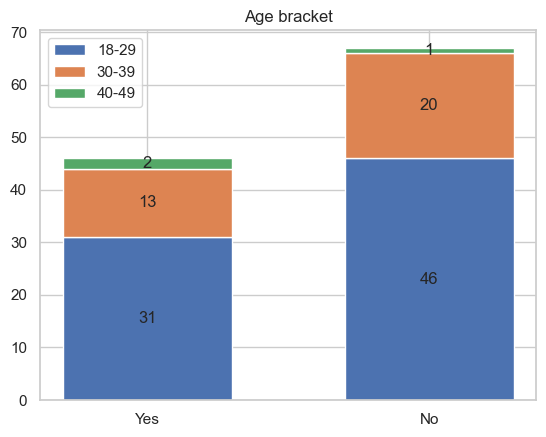

In [2193]:
conv_label = ['Yes','No']
label1 = {
    '18-29' : np.array([a,b]),
    '30-39' : np.array([c,d]),
    '40-49' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

In [2194]:
contingency_table = pd.crosstab(cdata1['age_bracket'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between the age bracket and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between the age bracket and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
age_bracket         
0            40   26
1            26   18
2             1    2

Chi-Square Statistic: 0.8855033134721649
P-Value: 0.6422666898898086
Degrees of Freedom: 2
Expected Frequencies:
 [[39.13274336 26.86725664]
 [26.08849558 17.91150442]
 [ 1.77876106  1.22123894]]

H0: There is no significant association between the age bracket and conversion
Fail to reject the null hypothesis: No significant association found.


##### Gender

male (yes)- 12
female (yes)- 34
male (no)- 33
female (no)- 34


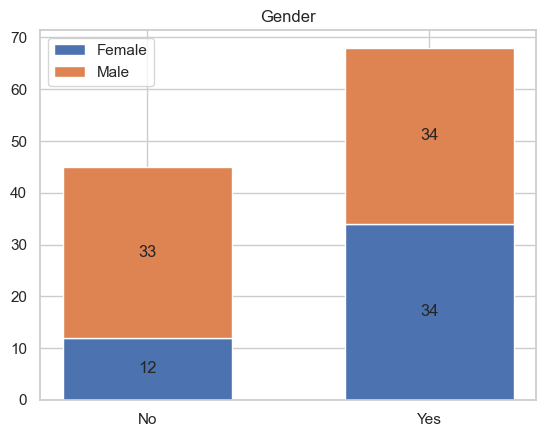

In [2195]:
cdata1['female'] = data['female']
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['female'] = pd.cut(cdata1['female'], bins=sex_bins, labels=sex_labels, right=False)


a = ((data['female'] == 0) & (data['conversion1'] >= 1)).sum()  # male yes
b = ((data['female'] == 1) & (data['conversion1'] >= 1)).sum()  # female yes
c = ((data['female'] == 0) & (data['conversion1'] < 1)).sum()   # male no
d = ((data['female'] == 1) & (data['conversion1'] < 1)).sum()   # female no

conv_label = ['No','Yes']
label1 = {
    'Female' : np.array([a,b]),
    'Male' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (yes)- " + str (a))
print("female (yes)- " + str (b))
print("male (no)- " + str (c))
print("female (no)- " + str (d))


male (yes)- 12
female (yes)- 34
male (no)- 33
female (no)- 34


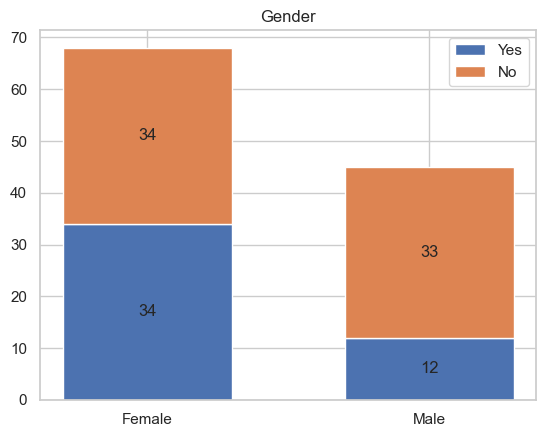

In [2196]:
conv_label = ['Female','Male']
label1 = {
    'Yes' : np.array([b,a]),
    'No' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (yes)- " + str (a))
print("female (yes)- " + str (b))
print("male (no)- " + str (c))
print("female (no)- " + str (d))

In [2197]:
contingency_table = pd.crosstab(cdata1['female'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between gender and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between gender and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
female              
0            33   12
1            34   34

Chi-Square Statistic: 5.179834655579734
P-Value: 0.02285049824536866
Degrees of Freedom: 1
Expected Frequencies:
 [[26.68141593 18.31858407]
 [40.31858407 27.68141593]]

H0: There is no significant association between gender and conversion
Reject the null hypothesis: There is a significant association between gender and conversion1.


##### Civil Status

Single yes- 17
Married yes- 29
Separated yes- 0
Widowed yes- 0
Single No- 40
Married No- 23
Separated No- 0
Widowed No- 4


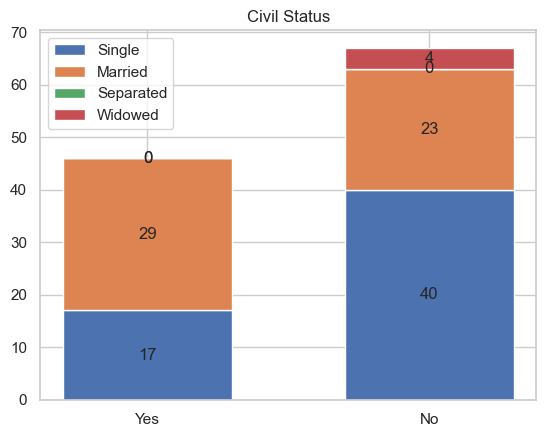

In [2198]:
cdata1['civil'] = data['civil']

civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

a = ((data['civil'] == 1)  & (data['conversion1'] >= 1) ).sum() # Single yes
b = ((data['civil'] == 2)  & (data['conversion1'] >= 1) ).sum() # Married yes
c = ((data['civil'] == 3)  & (data['conversion1'] >= 1) ).sum() # Separated yes
d = ((data['civil'] == 4)  & (data['conversion1'] >= 1) ).sum() # Widowed yes
e = ((data['civil'] == 1)  & (data['conversion1'] < 1) ).sum() # Single No
f = ((data['civil'] == 2)  & (data['conversion1'] < 1) ).sum() # Married No
g = ((data['civil'] == 3)  & (data['conversion1'] < 1) ).sum() # Separated No
h = ((data['civil'] == 4)  & (data['conversion1'] < 1) ).sum() # Widowed No



conv_label = ['Yes','No']
label1 = {
    'Single' : np.array([a,e]),
    'Married' : np.array([b,f]),
    'Separated' : np.array([c,g]),
    'Widowed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single yes- " + str (a))
print("Married yes- " + str (b))
print("Separated yes- " + str (c))
print("Widowed yes- " + str (d))
print("Single No- " + str (e))
print("Married No- " + str (f))
print("Separated No- " + str (g))
print("Widowed No- " + str (h))


Single yes- 17
Married yes- 29
Separated yes- 0
Widowed yes- 0
Single No- 40
Married No- 23
Separated No- 0
Widowed No- 4


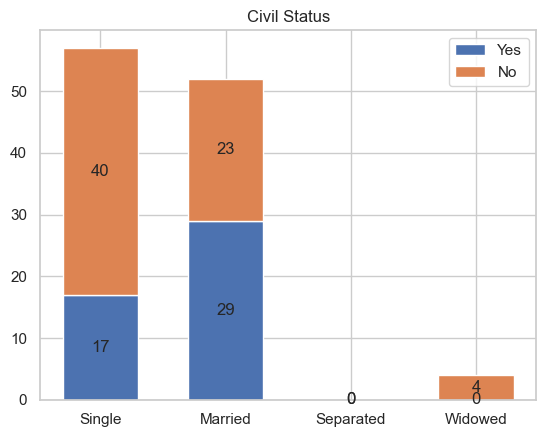

In [2199]:
conv_label = ['Single','Married','Separated','Widowed']
label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single yes- " + str (a))
print("Married yes- " + str (b))
print("Separated yes- " + str (c))
print("Widowed yes- " + str (d))
print("Single No- " + str (e))
print("Married No- " + str (f))
print("Separated No- " + str (g))
print("Widowed No- " + str (h))


Single yes- 17
Married yes- 29
Single No- 40
Married No- 23


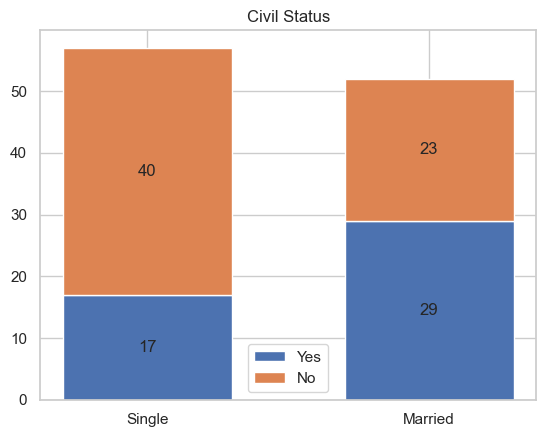

In [2200]:
conv_label = ['Single','Married']
label1 = {
    'Yes' : np.array([a,b]),
    'No' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single yes- " + str (a))
print("Married yes- " + str (b))
print("Single No- " + str (e))
print("Married No- " + str (f))


In [2201]:
contingency_table = pd.crosstab(cdata1['civil'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between civil status and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between civil status and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion1  No  Yes
civil               
1.0          40   17
2.0          23   29
4.0           4    0

Chi-Square Statistic: 10.43059357761448
P-Value: 0.005432820836769922
Degrees of Freedom: 2
Expected Frequencies:
 [[33.79646018 23.20353982]
 [30.83185841 21.16814159]
 [ 2.37168142  1.62831858]]

H0: There is no significant association between civil status and conversion
Reject the null hypothesis: There is a significant association between civil status and conversion1.


##### Job Type

Managerial YES- 3
Rank-and-file YES- 17
Self-employed YES- 17
Student YES- 3
Unemployed YES- 6
Managerial NO- 3
Rank-and-file NO- 29
Self-employed NO- 16
Student NO- 9
Unemployed NO- 10


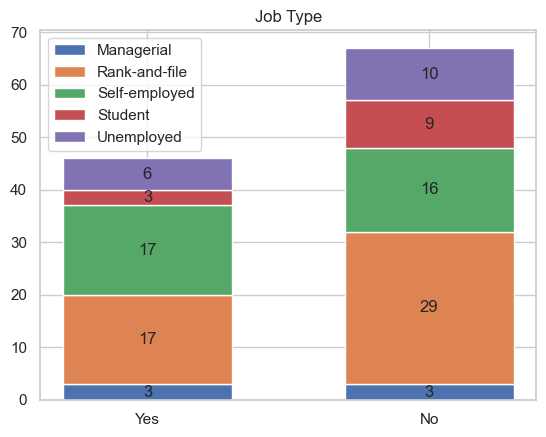

In [2202]:
cdata1['job_type'] = data['job type']

labels = ['Managerial','Rank-and-file','Self-employed',
          'Student','Unemployed']
bins =[1,2,3,4,5,99]
temp['job_type'] = pd.cut(cdata1['job_type'] , bins=bins, labels=labels, right=False)

a = ((data['job type'] == 1)  & (data['conversion1'] >= 1) ).sum() # Managerial yes
b = ((data['job type'] == 2)  & (data['conversion1'] >= 1) ).sum() # Rank-and-file yes
c = ((data['job type'] == 3)  & (data['conversion1'] >= 1) ).sum() # Self-employed yes
d = ((data['job type'] == 4)  & (data['conversion1'] >= 1) ).sum() # Student yes
e = ((data['job type'] == 5)  & (data['conversion1'] >= 1) ).sum() # Unemployed yes
f = ((data['job type'] == 1)  & (data['conversion1'] < 1) ).sum() # Managerial No
g = ((data['job type'] == 2)  & (data['conversion1'] < 1) ).sum() # Rank-and-file No
h = ((data['job type'] == 3)  & (data['conversion1'] < 1) ).sum() # Self-employed No
i = ((data['job type'] == 4)  & (data['conversion1'] < 1) ).sum() # Student No
j = ((data['job type'] == 5)  & (data['conversion1'] < 1) ).sum() # Unemployed No



conv_label = ['Yes','No']
label1 = {
    'Managerial' : np.array([a,f]),
    'Rank-and-file' : np.array([b,g]),
    'Self-employed' : np.array([c,h]),
    'Student' : np.array([d,i]),
    'Unemployed' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Job Type')
ax.legend()

print("Managerial YES- " + str (a))
print("Rank-and-file YES- " + str (b))
print("Self-employed YES- " + str (c))
print("Student YES- " + str (d))
print("Unemployed YES- " + str (e))
print("Managerial NO- " + str (f))
print("Rank-and-file NO- " + str (g))
print("Self-employed NO- " + str (h))
print("Student NO- " + str (i))
print("Unemployed NO- " + str (j))


Managerial YES- 3
Rank-and-file YES- 17
Self-employed YES- 17
Student YES- 3
Unemployed YES- 6
Managerial NO- 3
Rank-and-file NO- 29
Self-employed NO- 16
Student NO- 9
Unemployed NO- 10


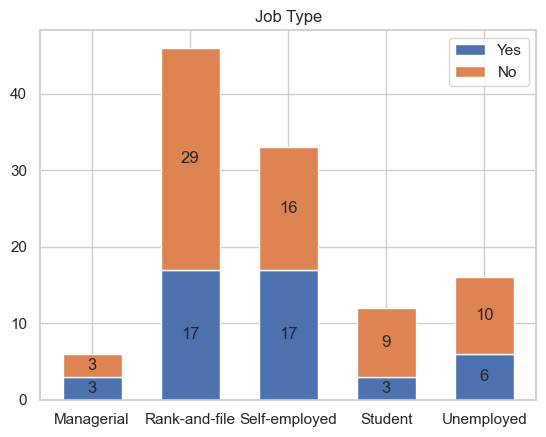

In [2203]:
conv_label = labels
label1 = {
    'Yes' : np.array([a,b,c,d,e]),
    'No' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Job Type')
ax.legend()

print("Managerial YES- " + str (a))
print("Rank-and-file YES- " + str (b))
print("Self-employed YES- " + str (c))
print("Student YES- " + str (d))
print("Unemployed YES- " + str (e))
print("Managerial NO- " + str (f))
print("Rank-and-file NO- " + str (g))
print("Self-employed NO- " + str (h))
print("Student NO- " + str (i))
print("Unemployed NO- " + str (j))

In [2204]:
contingency_table = pd.crosstab(cdata1['job_type'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between job type and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between job type and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion1  No  Yes
job_type            
1             3    3
2            29   17
3            16   17
4             9    3
5            10    6

Chi-Square Statistic: 3.3746318245514146
P-Value: 0.4971949785140325
Degrees of Freedom: 4
Expected Frequencies:
 [[ 3.55752212  2.44247788]
 [27.27433628 18.72566372]
 [19.56637168 13.43362832]
 [ 7.11504425  4.88495575]
 [ 9.48672566  6.51327434]]

H0: There is no significant association between job type and conversion
Fail to reject the null hypothesis: No significant association found.


##### Educational Attainment

College grad YES- 20
Post-grad YES- 0
Voc YES- 14
Elementary YES- 1
High School YES- 10
College grad NO- 22
Post-grad NO- 3
Voc NO- 19
Elementary NO- 0
High School NO- 21


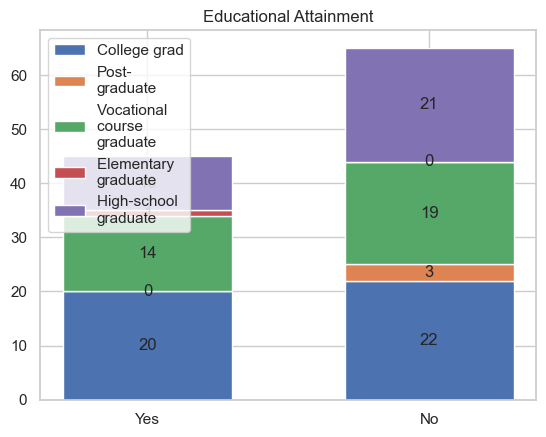

In [2205]:
cdata1['educ'] = data['educ']
labels = ['College grad','Post-\ngraduate','Vocational \ncourse \ngraduate','Elementary \ngraduate','High-school \ngraduate']
bins =[1,2,3,4,5,6]
temp['educ'] = pd.cut(cdata1['educ'], bins=bins, labels=labels, right=False)

a = ((data['educ'] == 1)  & (data['conversion1'] >= 1) ).sum() # College yes
b = ((data['educ'] == 2)  & (data['conversion1'] >= 1) ).sum() # Post-grad yes
c = ((data['educ'] == 3)  & (data['conversion1'] >= 1) ).sum() # Voc yes
d = ((data['educ'] == 4)  & (data['conversion1'] >= 1) ).sum() # Elem yes
e = ((data['educ'] == 5)  & (data['conversion1'] >= 1) ).sum() # HS yes
f = ((data['educ'] == 1)  & (data['conversion1'] < 1) ).sum() # College No
g = ((data['educ'] == 2)  & (data['conversion1'] < 1) ).sum() # Post-grad No
h = ((data['educ'] == 3)  & (data['conversion1'] < 1) ).sum() # Voc No
i = ((data['educ'] == 4)  & (data['conversion1'] < 1) ).sum() # Elem No
j = ((data['educ'] == 5)  & (data['conversion1'] < 1) ).sum() # HS No


conv_label = ['Yes','No']
label1 = {
    'College grad' : np.array([a,f]),
    'Post-\ngraduate' : np.array([b,g]),
    'Vocational \ncourse \ngraduate' : np.array([c,h]),
    'Elementary \ngraduate' : np.array([d,i]),
    'High-school \ngraduate' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Educational Attainment')
ax.legend()

print("College grad YES- " + str (a))
print("Post-grad YES- " + str (b))
print("Voc YES- " + str (c))
print("Elementary YES- " + str (d))
print("High School YES- " + str (e))
print("College grad NO- " + str (f))
print("Post-grad NO- " + str (g))
print("Voc NO- " + str (h))
print("Elementary NO- " + str (i))
print("High School NO- " + str (j))



College grad YES- 20
Post-grad YES- 0
Voc YES- 14
Elementary YES- 1
High School YES- 10
College grad NO- 22
Post-grad NO- 3
Voc NO- 19
Elementary NO- 0
High School NO- 21


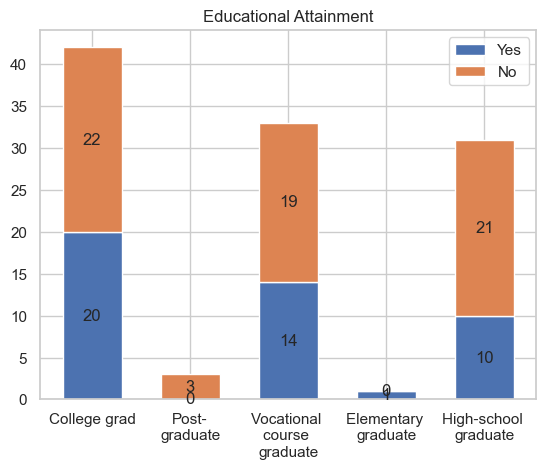

In [2206]:
conv_label = labels
label1 = {
    'Yes' : np.array([a,b,c,d,e]),
    'No' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Educational Attainment')
ax.legend()

print("College grad YES- " + str (a))
print("Post-grad YES- " + str (b))
print("Voc YES- " + str (c))
print("Elementary YES- " + str (d))
print("High School YES- " + str (e))
print("College grad NO- " + str (f))
print("Post-grad NO- " + str (g))
print("Voc NO- " + str (h))
print("Elementary NO- " + str (i))
print("High School NO- " + str (j))

In [2207]:
contingency_table = pd.crosstab(cdata1['job_type'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between educational attainment and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between educational attainment and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
job_type            
1             3    3
2            29   17
3            16   17
4             9    3
5            10    6

Chi-Square Statistic: 3.3746318245514146
P-Value: 0.4971949785140325
Degrees of Freedom: 4
Expected Frequencies:
 [[ 3.55752212  2.44247788]
 [27.27433628 18.72566372]
 [19.56637168 13.43362832]
 [ 7.11504425  4.88495575]
 [ 9.48672566  6.51327434]]

H0: There is no significant association between educational attainment and conversion
Fail to reject the null hypothesis: No significant association found.


##### Gender Identification

Female yes- 31
Male yes- 11
LGBTQIA+ yes- 3
Undisclosed yes- 1
Female No- 33
Male No- 32
LGBTQIA+ No- 2
Undisclosed No- 0


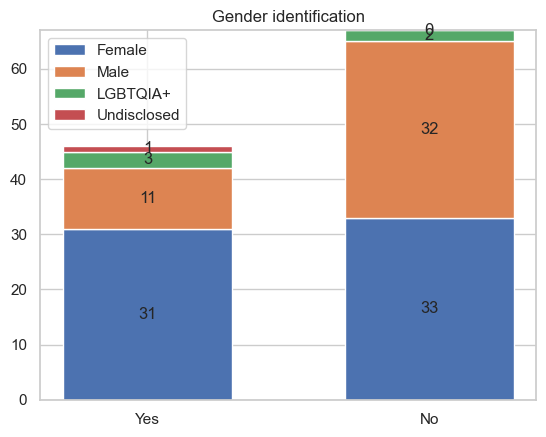

In [2208]:
cdata1['genderid'] = data['genderid']

labels = ['Female','Male','LGBTQIA+','Undisclosed']
bins =[1,2,3,4,99]
temp['genderid'] = pd.cut(cdata1['genderid'], bins=bins, labels=labels, right=False)

a = ((data['genderid'] == 1)  & (data['conversion1'] >= 1) ).sum() # Female yes
b = ((data['genderid'] == 2)  & (data['conversion1'] >= 1) ).sum() # Male yes
c = ((data['genderid'] == 3)  & (data['conversion1'] >= 1) ).sum() # LGBTQIA+ yes
d = ((data['genderid'] == 4)  & (data['conversion1'] >= 1) ).sum() # Undisclosed yes
e = ((data['genderid'] == 1)  & (data['conversion1'] < 1) ).sum() # Female No
f = ((data['genderid'] == 2)  & (data['conversion1'] < 1) ).sum() # Male No
g = ((data['genderid'] == 3)  & (data['conversion1'] < 1) ).sum() # LGBTQIA+ No
h = ((data['genderid'] == 4)  & (data['conversion1'] < 1) ).sum() # Undisclosed No



conv_label = ['Yes','No']
label1 = {
    'Female' : np.array([a,e]),
    'Male' : np.array([b,f]),
    'LGBTQIA+' : np.array([c,g]),
    'Undisclosed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender identification')
ax.legend()

print("Female yes- " + str (a))
print("Male yes- " + str (b))
print("LGBTQIA+ yes- " + str (c))
print("Undisclosed yes- " + str (d))
print("Female No- " + str (e))
print("Male No- " + str (f))
print("LGBTQIA+ No- " + str (g))
print("Undisclosed No- " + str (h))


Female yes- 31
Male yes- 11
LGBTQIA+ yes- 3
Undisclosed yes- 1
Female No- 33
Male No- 32
LGBTQIA+ No- 2
Undisclosed No- 0


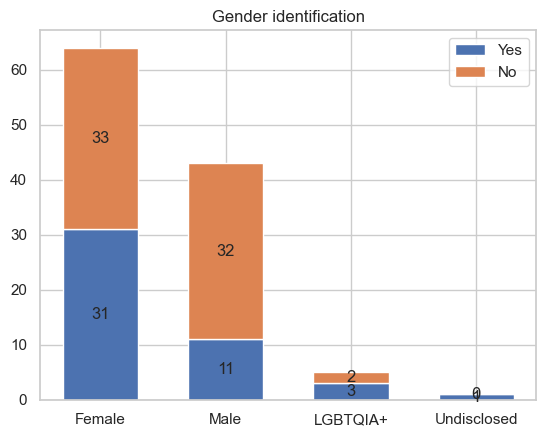

In [2209]:
conv_label = ['Female','Male','LGBTQIA+','Undisclosed']
label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender identification')
ax.legend()

print("Female yes- " + str (a))
print("Male yes- " + str (b))
print("LGBTQIA+ yes- " + str (c))
print("Undisclosed yes- " + str (d))
print("Female No- " + str (e))
print("Male No- " + str (f))
print("LGBTQIA+ No- " + str (g))
print("Undisclosed No- " + str (h))

In [2210]:
contingency_table = pd.crosstab(cdata1['job_type'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between gender identification and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between gender identification and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
job_type            
1             3    3
2            29   17
3            16   17
4             9    3
5            10    6

Chi-Square Statistic: 3.3746318245514146
P-Value: 0.4971949785140325
Degrees of Freedom: 4
Expected Frequencies:
 [[ 3.55752212  2.44247788]
 [27.27433628 18.72566372]
 [19.56637168 13.43362832]
 [ 7.11504425  4.88495575]
 [ 9.48672566  6.51327434]]

H0: There is no significant association between gender identification and conversion
Fail to reject the null hypothesis: No significant association found.


##### Location

NCR yes- 33
Luzon yes- 12
Visayas yes- 0
Mindanao yes- 1
NCR No- 41
Luzon No- 17
Visayas No- 1
Mindanao No- 8


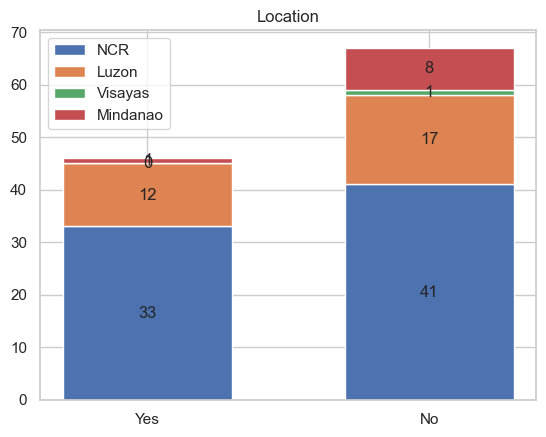

In [2211]:
cdata1['loc'] = data['loc']
labels = ['NCR','Luzon','Visayas','Mindanao']
bins =[1,2,3,4,99]
temp['loc'] = pd.cut(cdata1['female'], bins=bins, labels=labels, right=False)

a = ((data['loc'] == 1)  & (data['conversion1'] >= 1) ).sum() # NCR yes
b = ((data['loc'] == 2)  & (data['conversion1'] >= 1) ).sum() # Luzon yes
c = ((data['loc'] == 3)  & (data['conversion1'] >= 1) ).sum() # Visayas yes
d = ((data['loc'] == 4)  & (data['conversion1'] >= 1) ).sum() # Mindanao yes
e = ((data['loc'] == 1)  & (data['conversion1'] < 1) ).sum() # NCR No
f = ((data['loc'] == 2)  & (data['conversion1'] < 1) ).sum() # Luzon No
g = ((data['loc'] == 3)  & (data['conversion1'] < 1) ).sum() # Visayas No
h = ((data['loc'] == 4)  & (data['conversion1'] < 1) ).sum() # Mindanao No



conv_label = ['Yes','No']
label1 = {
    'NCR' : np.array([a,e]),
    'Luzon' : np.array([b,f]),
    'Visayas' : np.array([c,g]),
    'Mindanao' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Location')
ax.legend()

print("NCR yes- " + str (a))
print("Luzon yes- " + str (b))
print("Visayas yes- " + str (c))
print("Mindanao yes- " + str (d))
print("NCR No- " + str (e))
print("Luzon No- " + str (f))
print("Visayas No- " + str (g))
print("Mindanao No- " + str (h))



NCR yes- 33
Luzon yes- 12
Visayas yes- 0
Mindanao yes- 1
NCR No- 41
Luzon No- 17
Visayas No- 1
Mindanao No- 8


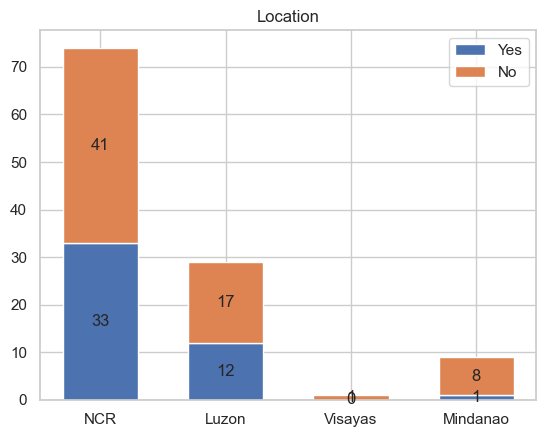

In [2212]:
conv_label = ['NCR','Luzon','Visayas','Mindanao']
label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Location')
ax.legend()

print("NCR yes- " + str (a))
print("Luzon yes- " + str (b))
print("Visayas yes- " + str (c))
print("Mindanao yes- " + str (d))
print("NCR No- " + str (e))
print("Luzon No- " + str (f))
print("Visayas No- " + str (g))
print("Mindanao No- " + str (h))

In [2213]:
contingency_table = pd.crosstab(cdata1['job_type'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between location and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between location and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
job_type            
1             3    3
2            29   17
3            16   17
4             9    3
5            10    6

Chi-Square Statistic: 3.3746318245514146
P-Value: 0.4971949785140325
Degrees of Freedom: 4
Expected Frequencies:
 [[ 3.55752212  2.44247788]
 [27.27433628 18.72566372]
 [19.56637168 13.43362832]
 [ 7.11504425  4.88495575]
 [ 9.48672566  6.51327434]]

H0: There is no significant association between location and conversion
Fail to reject the null hypothesis: No significant association found.


##### Results

In [2214]:
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])
temp['genderid'] = label_encoder.fit_transform(cdata1['genderid'])
temp['loc'] = label_encoder.fit_transform(cdata1['loc'])


X = temp[['age_bracket', 'female', 'civil', 'job_type','educ','genderid','loc']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 3:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.622695
         Iterations 5


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  113
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                 0.07855
Time:                        13:17:58   Log-Likelihood:                -70.364
converged:                       True   LL-Null:                       -76.363
Covariance Type:            nonrobust   LLR p-value:                   0.06204
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.0389      0.365     -0.107      0.915      -0.755      

significant (p<0.05): female (gender), civil (civil status), genderid (gender id)

#### Other Features

##### Devices

Others (yes)- 3
Smartphone (yes)- 43
Others (no)- 8
Smartphone (no)- 59


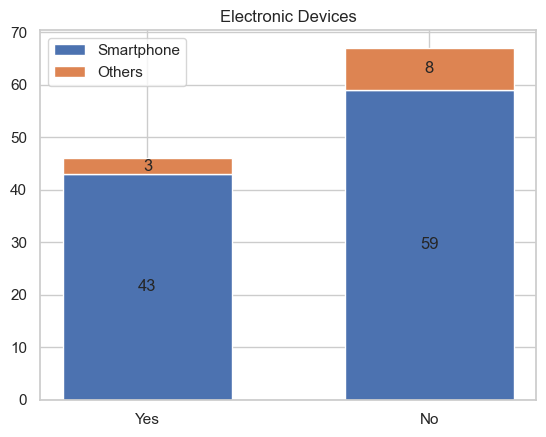

In [2215]:
cdata1['devices'] = data['devices']
labels = ['Others','Smartphone']
bins =[0,1,99]
temp['devices'] = pd.cut(cdata1['devices'], bins=bins, labels=labels, right=False)


a = ((data['devices'] == 0) & (data['conversion1'] >= 1)).sum()  # Others yes
b = ((data['devices'] == 1) & (data['conversion1'] >= 1)).sum()  # Smartphone yes
c = ((data['devices'] == 0) & (data['conversion1'] < 1)).sum()   # Others no
d = ((data['devices'] == 1) & (data['conversion1'] < 1)).sum()   # Smartphone no

conv_label = ['Yes','No']
label1 = {
    'Smartphone' : np.array([b,d]),
    'Others' : np.array([a,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Electronic Devices')
ax.legend()

print("Others (yes)- " + str (a))
print("Smartphone (yes)- " + str (b))
print("Others (no)- " + str (c))
print("Smartphone (no)- " + str (d))

Others (yes)- 3
Smartphone (yes)- 43
Others (no)- 8
Smartphone (no)- 59


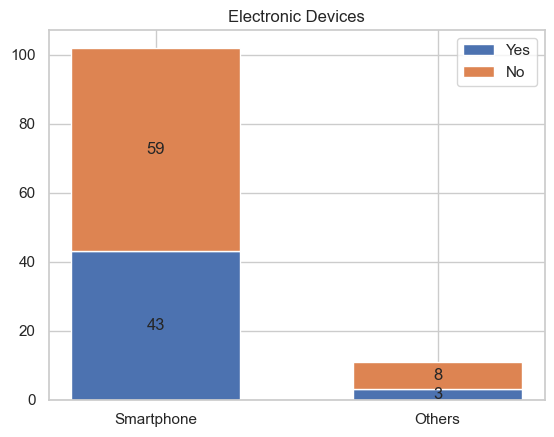

In [2216]:

conv_label = ['Smartphone','Others']
label1 = {
    'Yes' : np.array([b,a]),
    'No' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Electronic Devices')
ax.legend()

print("Others (yes)- " + str (a))
print("Smartphone (yes)- " + str (b))
print("Others (no)- " + str (c))
print("Smartphone (no)- " + str (d))

In [2217]:
contingency_table = pd.crosstab(cdata1['job_type'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between devices used and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between devices used and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
job_type            
1             3    3
2            29   17
3            16   17
4             9    3
5            10    6

Chi-Square Statistic: 3.3746318245514146
P-Value: 0.4971949785140325
Degrees of Freedom: 4
Expected Frequencies:
 [[ 3.55752212  2.44247788]
 [27.27433628 18.72566372]
 [19.56637168 13.43362832]
 [ 7.11504425  4.88495575]
 [ 9.48672566  6.51327434]]

H0: There is no significant association between devices used and conversion
Fail to reject the null hypothesis: No significant association found.


##### Purpose of Visit

recomendation yes- 7
exploring yes- 18
want to know yes- 11
attracted yes- 10
recomendation No- 13
exploring No- 28
want to know No- 16
attracted No- 10


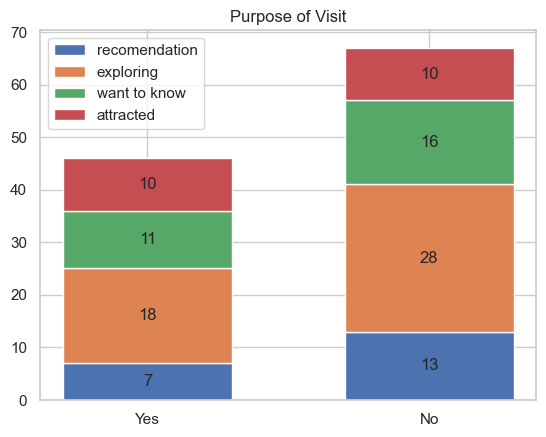

In [2218]:
cdata1['purpose'] = data['purpose page']
labels = ['A friend/relative recommended me to visit this page',
          'I am exploring using a Family Planning (FP) product or service and i want to know what is right for me',
          'I want to know the health facilities offering the Family Planning services near me',
          'I was visually attracted to the posted materials']
bins =[1,2,3,4,99]
temp['purpose'] = pd.cut(cdata1['purpose'], bins=bins, labels=labels, right=False)

a = ((data['purpose page'] == 1)  & (data['conversion1'] >= 1) ).sum() # recomendation yes
b = ((data['purpose page'] == 2)  & (data['conversion1'] >= 1) ).sum() # exploring yes
c = ((data['purpose page'] == 3)  & (data['conversion1'] >= 1) ).sum() # want to know yes
d = ((data['purpose page'] == 4)  & (data['conversion1'] >= 1) ).sum() # attracted yes
e = ((data['purpose page'] == 1)  & (data['conversion1'] < 1) ).sum() # recomendation No
f = ((data['purpose page'] == 2)  & (data['conversion1'] < 1) ).sum() # exploring No
g = ((data['purpose page'] == 3)  & (data['conversion1'] < 1) ).sum() # want to know No
h = ((data['purpose page'] == 4)  & (data['conversion1'] < 1) ).sum() # attracted No



conv_label = ['Yes','No']
label1 = {
    'recomendation' : np.array([a,e]),
    'exploring' : np.array([b,f]),
    'want to know' : np.array([c,g]),
    'attracted' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Purpose of Visit')
ax.legend()

print("recomendation yes- " + str (a))
print("exploring yes- " + str (b))
print("want to know yes- " + str (c))
print("attracted yes- " + str (d))
print("recomendation No- " + str (e))
print("exploring No- " + str (f))
print("want to know No- " + str (g))
print("attracted No- " + str (h))



recomendation yes- 7
exploring yes- 18
want to know yes- 11
attracted yes- 10
recomendation No- 13
exploring No- 28
want to know No- 16
attracted No- 10


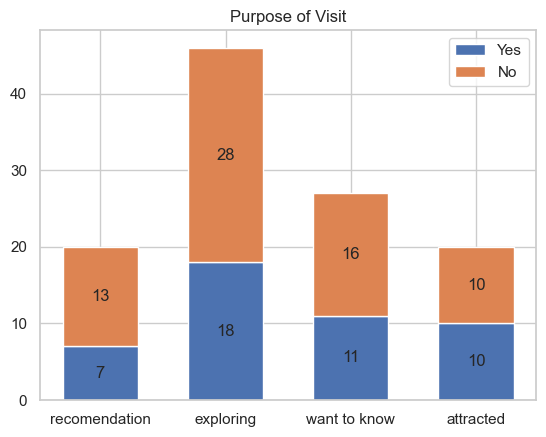

In [2219]:
conv_label = ['recomendation','exploring', 'want to know','attracted']
label1 = {
    'recomendation' : np.array([a,e]),
    'exploring' : np.array([b,f]),
    'want to know' : np.array([c,g]),
    'attracted' : np.array([d,h])
}
label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Purpose of Visit')
ax.legend()

print("recomendation yes- " + str (a))
print("exploring yes- " + str (b))
print("want to know yes- " + str (c))
print("attracted yes- " + str (d))
print("recomendation No- " + str (e))
print("exploring No- " + str (f))
print("want to know No- " + str (g))
print("attracted No- " + str (h))

In [2220]:
contingency_table = pd.crosstab(cdata1['purpose'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between purpose of visit and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between purpose of visit and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
purpose             
1            13    7
2            28   18
3            16   11
4            10   10

Chi-Square Statistic: 1.03285559704105
P-Value: 0.7933025678734194
Degrees of Freedom: 3
Expected Frequencies:
 [[11.85840708  8.14159292]
 [27.27433628 18.72566372]
 [16.00884956 10.99115044]
 [11.85840708  8.14159292]]

H0: There is no significant association between purpose of visit and conversion
Fail to reject the null hypothesis: No significant association found.


##### Perceived RH needs

In [2221]:
cdata1['rh_needs'] = data['perceived rh needs']
cdata1['rh_needs'].nunique()

5

inform YES- 23
explore YES- 11
limit YES- 5
practice YES- 6
satisfy YES- 1
inform NO- 33
explore NO- 15
limit NO- 6
practice NO- 11
satisfy NO- 2


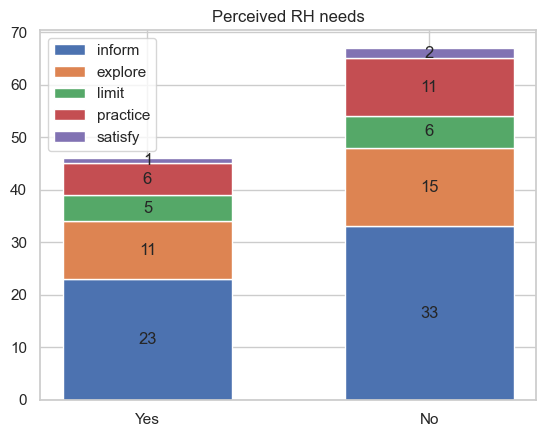

In [2222]:
labels = ['I want to be informed about reproductive health and family planning',
          'I am exploring using a Family Planning (FP) product or service and i want to know what is right for me',
          'I want to limit the number of children',
          'I want to practice safe sex without getting pregnant ',
          'I want to satisfy my partner’s needs']
bins =[1,2,3,4,5,6]
temp['rh_needs'] = pd.cut(cdata1['rh_needs'], bins=bins, labels=labels, right=False)

a = ((data['perceived rh needs'] == 1)  & (data['conversion1'] >= 1) ).sum() # inform yes
b = ((data['perceived rh needs'] == 2)  & (data['conversion1'] >= 1) ).sum() # explore yes
c = ((data['perceived rh needs'] == 3)  & (data['conversion1'] >= 1) ).sum() # limit yes
d = ((data['perceived rh needs'] == 4)  & (data['conversion1'] >= 1) ).sum() # practice yes
e = ((data['perceived rh needs'] == 5)  & (data['conversion1'] >= 1) ).sum() # satisfy yes
f = ((data['perceived rh needs'] == 1)  & (data['conversion1'] < 1) ).sum() # inform No
g = ((data['perceived rh needs'] == 2)  & (data['conversion1'] < 1) ).sum() # explore No
h = ((data['perceived rh needs'] == 3)  & (data['conversion1'] < 1) ).sum() # limit No
i = ((data['perceived rh needs'] == 4)  & (data['conversion1'] < 1) ).sum() # practice No
j = ((data['perceived rh needs'] == 5)  & (data['conversion1'] < 1) ).sum() # satisfy No


conv_label = ['Yes','No']
label1 = {
    'inform' : np.array([a,f]),
    'explore' : np.array([b,g]),
    'limit' : np.array([c,h]),
    'practice' : np.array([d,i]),
    'satisfy' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Perceived RH needs')
ax.legend()

print("inform YES- " + str (a))
print("explore YES- " + str (b))
print("limit YES- " + str (c))
print("practice YES- " + str (d))
print("satisfy YES- " + str (e))
print("inform NO- " + str (f))
print("explore NO- " + str (g))
print("limit NO- " + str (h))
print("practice NO- " + str (i))
print("satisfy NO- " + str (j))



inform YES- 23
explore YES- 11
limit YES- 5
practice YES- 6
satisfy YES- 1
inform NO- 33
explore NO- 15
limit NO- 6
practice NO- 11
satisfy NO- 2


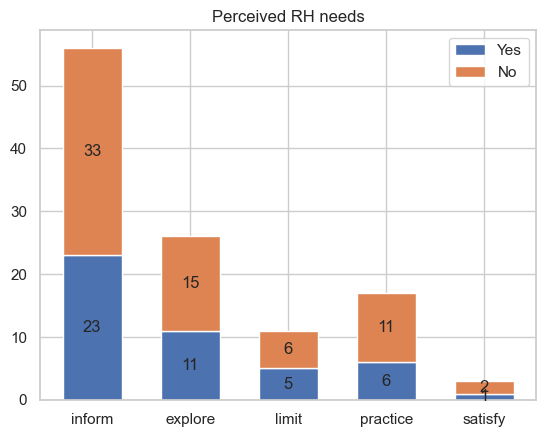

In [2223]:
conv_label = ['inform','explore','limit','practice','satisfy']
label1 = {
    'Yes' : np.array([a,b,c,d,e]),
    'No' : np.array([f,g,h,i,j])
}


fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Perceived RH needs')
ax.legend()

print("inform YES- " + str (a))
print("explore YES- " + str (b))
print("limit YES- " + str (c))
print("practice YES- " + str (d))
print("satisfy YES- " + str (e))
print("inform NO- " + str (f))
print("explore NO- " + str (g))
print("limit NO- " + str (h))
print("practice NO- " + str (i))
print("satisfy NO- " + str (j))

In [2224]:
contingency_table = pd.crosstab(cdata1['rh_needs'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between Perceived RH needs and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Perceived RH needs and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
rh_needs            
1            33   23
2            15   11
3             6    5
4            11    6
5             2    1

Chi-Square Statistic: 0.4073430045225477
P-Value: 0.9818713068971437
Degrees of Freedom: 4
Expected Frequencies:
 [[33.20353982 22.79646018]
 [15.4159292  10.5840708 ]
 [ 6.52212389  4.47787611]
 [10.07964602  6.92035398]
 [ 1.77876106  1.22123894]]

H0: There is no significant association between Perceived RH needs and conversion
Fail to reject the null hypothesis: No significant association found.


##### No. of Benefits of using FP

In [2225]:
cdata1['benefitnum'] = data['benefitnum']
cdata1['benefitnum'].nunique()

5

1 YES- 23
2 YES- 11
3 YES- 5
4 YES- 6
5 YES- 1
1 NO- 33
2 NO- 15
3 NO- 6
4 NO- 11
5 NO- 2


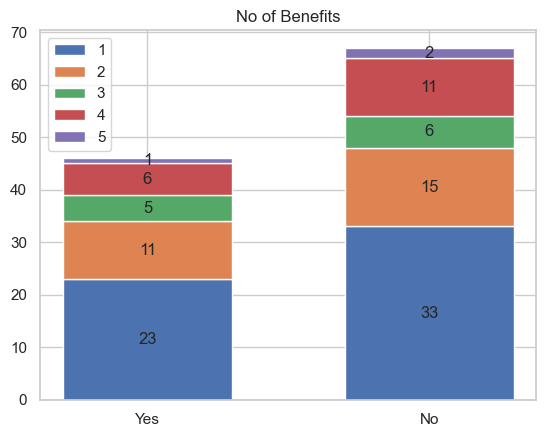

In [2226]:
a = ((data['perceived rh needs'] == 1)  & (data['conversion1'] >= 1) ).sum() # 1 yes
b = ((data['perceived rh needs'] == 2)  & (data['conversion1'] >= 1) ).sum() # 2 yes
c = ((data['perceived rh needs'] == 3)  & (data['conversion1'] >= 1) ).sum() # 3 yes
d = ((data['perceived rh needs'] == 4)  & (data['conversion1'] >= 1) ).sum() # 4 yes
e = ((data['perceived rh needs'] == 5)  & (data['conversion1'] >= 1) ).sum() # 5 yes
f = ((data['perceived rh needs'] == 1)  & (data['conversion1'] < 1) ).sum() # 1 No
g = ((data['perceived rh needs'] == 2)  & (data['conversion1'] < 1) ).sum() # 2 No
h = ((data['perceived rh needs'] == 3)  & (data['conversion1'] < 1) ).sum() # 3 No
i = ((data['perceived rh needs'] == 4)  & (data['conversion1'] < 1) ).sum() # 4 No
j = ((data['perceived rh needs'] == 5)  & (data['conversion1'] < 1) ).sum() # 5 No


conv_label = ['Yes','No']
label1 = {
    '1' : np.array([a,f]),
    '2' : np.array([b,g]),
    '3' : np.array([c,h]),
    '4' : np.array([d,i]),
    '5' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('No of Benefits')
ax.legend()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("1 NO- " + str (f))
print("2 NO- " + str (g))
print("3 NO- " + str (h))
print("4 NO- " + str (i))
print("5 NO- " + str (j))

1 YES- 23
2 YES- 11
3 YES- 5
4 YES- 6
5 YES- 1
1 NO- 33
2 NO- 15
3 NO- 6
4 NO- 11
5 NO- 2


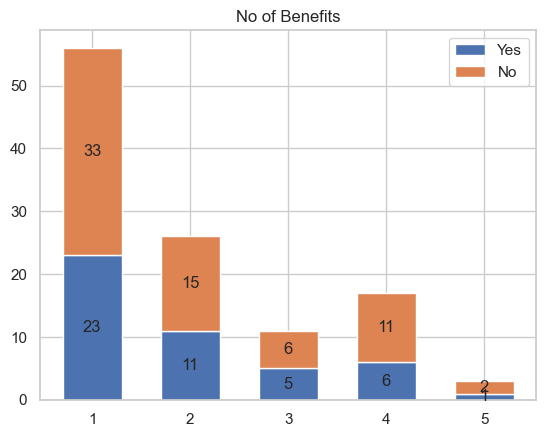

In [2227]:
conv_label = ['1','2','3','4','5']
label1 = {
    'Yes' : np.array([a,b,c,d,e]),
    'No' : np.array([f,g,h,i,j])
}


fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('No of Benefits')
ax.legend()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("1 NO- " + str (f))
print("2 NO- " + str (g))
print("3 NO- " + str (h))
print("4 NO- " + str (i))
print("5 NO- " + str (j))

In [2228]:
contingency_table = pd.crosstab(cdata1['rh_needs'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between No of FP benefits and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between No of FP benefits and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
rh_needs            
1            33   23
2            15   11
3             6    5
4            11    6
5             2    1

Chi-Square Statistic: 0.4073430045225477
P-Value: 0.9818713068971437
Degrees of Freedom: 4
Expected Frequencies:
 [[33.20353982 22.79646018]
 [15.4159292  10.5840708 ]
 [ 6.52212389  4.47787611]
 [10.07964602  6.92035398]
 [ 1.77876106  1.22123894]]

H0: There is no significant association between No of FP benefits and conversion
Fail to reject the null hypothesis: No significant association found.


##### No. of platforms visited

In [2229]:
cdata1['platforms'] = data['platforms']
cdata1['platforms'].nunique()

3

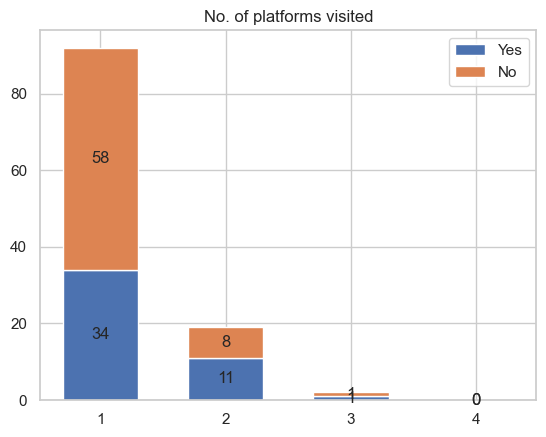

1 YES- 34
2 YES- 11
3 YES- 1
4 YES- 0
1 NO- 58
2 NO- 8
3 NO- 1
4 NO- 0


In [2230]:
a = ((data['platforms'] == 1 )  & (data['conversion1'] >= 1) ).sum() # 1 yes
b = ((data['platforms'] == 2 )  & (data['conversion1'] >= 1) ).sum() # 2 yes
c = ((data['platforms'] == 3 )  & (data['conversion1'] >= 1) ).sum() # 3 yes
d = ((data['platforms'] == 4 )  & (data['conversion1'] >= 1) ).sum() # 4 yes
e = ((data['platforms'] == 1 )  & (data['conversion1'] < 1) ).sum() # 1 no
f = ((data['platforms'] == 2 )  & (data['conversion1'] < 1) ).sum() # 2 no
g = ((data['platforms'] == 3 )  & (data['conversion1'] < 1) ).sum() # 3 no
h = ((data['platforms'] == 4 )  & (data['conversion1'] < 1) ).sum() # 4 nbo

labels = ['1','2','3','4']

label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('No. of platforms visited')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("1 NO- " + str (e))
print("2 NO- " + str (f))
print("3 NO- " + str (g))
print("4 NO- " + str (h))


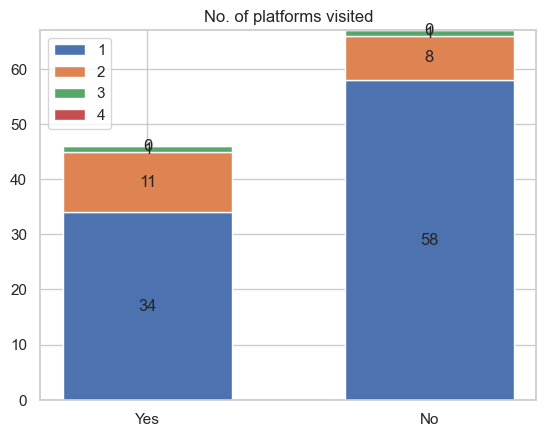

1 YES- 34
2 YES- 11
3 YES- 1
4 YES- 0
1 NO- 58
2 NO- 8
3 NO- 1
4 NO- 0


In [2231]:
labels = ['Yes','No']

label1 = {
    '1' : np.array([a,e]),
    '2' : np.array([b,f]),
    '3' : np.array([c,g]),
    '4' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('No. of platforms visited')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("1 NO- " + str (e))
print("2 NO- " + str (f))
print("3 NO- " + str (g))
print("4 NO- " + str (h))

In [2232]:
contingency_table = pd.crosstab(cdata1['platforms'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between No of platforms visited and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between No of platforms visited and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
platforms           
1            58   34
2             8   11
3             1    1

Chi-Square Statistic: 2.9332022357617946
P-Value: 0.2307083044085589
Degrees of Freedom: 2
Expected Frequencies:
 [[54.54867257 37.45132743]
 [11.26548673  7.73451327]
 [ 1.18584071  0.81415929]]

H0: There is no significant association between No of platforms visited and conversion
Fail to reject the null hypothesis: No significant association found.


##### Frequency of Visit to page

In [2233]:
cdata1['oftenvisit'] = data['oftenvisit']
cdata1['oftenvisit'].nunique()

5

1 YES- 9
2 YES- 15
3 YES- 10
4 YES- 5
5 YES- 7
1 NO- 4
2 NO- 19
3 NO- 16
4 NO- 19
5 NO- 9


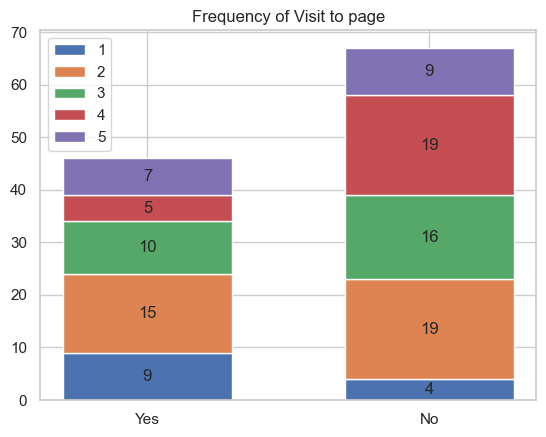

In [2234]:
a = ((data['oftenvisit'] == 1)  & (data['conversion1'] >= 1) ).sum() # 1 yes
b = ((data['oftenvisit'] == 2)  & (data['conversion1'] >= 1) ).sum() # 2 yes
c = ((data['oftenvisit'] == 3)  & (data['conversion1'] >= 1) ).sum() # 3 yes
d = ((data['oftenvisit'] == 4)  & (data['conversion1'] >= 1) ).sum() # 4 yes
e = ((data['oftenvisit'] == 5)  & (data['conversion1'] >= 1) ).sum() # 5 yes
f = ((data['oftenvisit'] == 1)  & (data['conversion1'] < 1) ).sum() # 1 No
g = ((data['oftenvisit'] == 2)  & (data['conversion1'] < 1) ).sum() # 2 No
h = ((data['oftenvisit'] == 3)  & (data['conversion1'] < 1) ).sum() # 3 No
i = ((data['oftenvisit'] == 4)  & (data['conversion1'] < 1) ).sum() # 4 No
j = ((data['oftenvisit'] == 5)  & (data['conversion1'] < 1) ).sum() # 5 No


conv_label = ['Yes','No']
label1 = {
    '1' : np.array([a,f]),
    '2' : np.array([b,g]),
    '3' : np.array([c,h]),
    '4' : np.array([d,i]),
    '5' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Frequency of Visit to page')
ax.legend()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("1 NO- " + str (f))
print("2 NO- " + str (g))
print("3 NO- " + str (h))
print("4 NO- " + str (i))
print("5 NO- " + str (j))

1 YES- 9
2 YES- 15
3 YES- 10
4 YES- 5
5 YES- 7
1 NO- 4
2 NO- 19
3 NO- 16
4 NO- 19
5 NO- 9


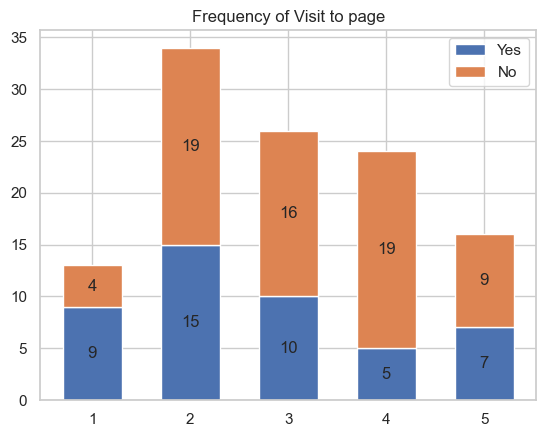

In [2235]:
conv_label = ['1','2','3','4','5']


label1 = {
    'Yes' : np.array([a,b,c,d,e]),
    'No' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Frequency of Visit to page')
ax.legend()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("1 NO- " + str (f))
print("2 NO- " + str (g))
print("3 NO- " + str (h))
print("4 NO- " + str (i))
print("5 NO- " + str (j))

In [2236]:
contingency_table = pd.crosstab(cdata1['oftenvisit'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between Frequency of Visit and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Frequency of Visit and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
oftenvisit          
1             4    9
2            19   15
3            16   10
4            19    5
5             9    7

Chi-Square Statistic: 8.588926096695353
P-Value: 0.0722371023771502
Degrees of Freedom: 4
Expected Frequencies:
 [[ 7.7079646   5.2920354 ]
 [20.15929204 13.84070796]
 [15.4159292  10.5840708 ]
 [14.2300885   9.7699115 ]
 [ 9.48672566  6.51327434]]

H0: There is no significant association between Frequency of Visit and conversion
Fail to reject the null hypothesis: No significant association found.


##### How did you learn about CPD and Usap Tayo sa Family Planning FB pages? 

In [2237]:
cdata1['learnpage'] = data['learnpage']
cdata1['learnpage'].nunique()

4

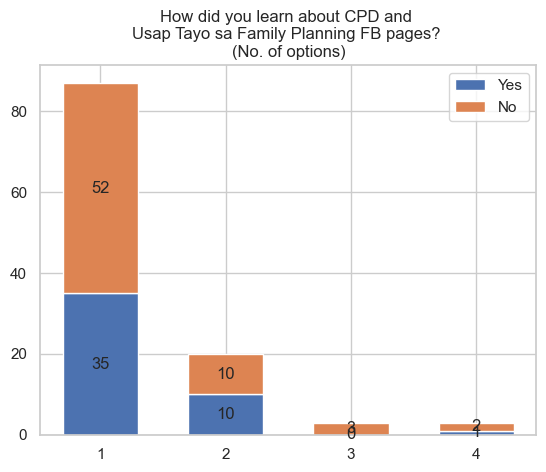

1 YES- 35
2 YES- 10
3 YES- 0
4 YES- 1
1 NO- 52
2 NO- 10
3 NO- 3
4 NO- 2


In [2238]:
a = ((data['learnpage'] == 1)  & (data['conversion1'] >= 1) ).sum() # 1 yes
b = ((data['learnpage'] == 2)  & (data['conversion1'] >= 1) ).sum() # 2 yes
c = ((data['learnpage'] == 3)  & (data['conversion1'] >= 1) ).sum() # 3 yes
d = ((data['learnpage'] == 4)  & (data['conversion1'] >= 1) ).sum() # 4 yes
e = ((data['learnpage'] == 1)  & (data['conversion1'] < 1) ).sum() # 1 No
f = ((data['learnpage'] == 2)  & (data['conversion1'] < 1) ).sum() # 2 No
g = ((data['learnpage'] == 3)  & (data['conversion1'] < 1) ).sum() # 3 No
h = ((data['learnpage'] == 4)  & (data['conversion1'] < 1) ).sum() # 4 No

labels = ['1','2','3','4']

label1 = {
    'Yes' : np.array([a,b,c,d]),
    'No' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('How did you learn about CPD and \nUsap Tayo sa Family Planning FB pages? \n(No. of options)')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("1 NO- " + str (e))
print("2 NO- " + str (f))
print("3 NO- " + str (g))
print("4 NO- " + str (h))


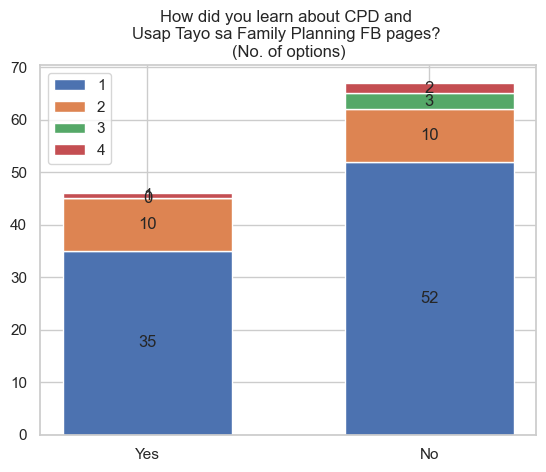

1 YES- 35
2 YES- 10
3 YES- 0
4 YES- 1
1 NO- 52
2 NO- 10
3 NO- 3
4 NO- 2


In [2239]:
labels = ['Yes','No']

label1 = {
    '1' : np.array([a,e]),
    '2' : np.array([b,f]),
    '3' : np.array([c,g]),
    '4' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('How did you learn about CPD and \nUsap Tayo sa Family Planning FB pages? \n(No. of options)')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("1 NO- " + str (e))
print("2 NO- " + str (f))
print("3 NO- " + str (g))
print("4 NO- " + str (h))

In [2240]:
contingency_table = pd.crosstab(cdata1['learnpage'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between how did you learn about FB pages and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between how did you learn about FB pages and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
learnpage           
1            52   35
2            10   10
3             3    0
4             2    1

Chi-Square Statistic: 2.8509812258050076
P-Value: 0.4151761149784011
Degrees of Freedom: 3
Expected Frequencies:
 [[51.5840708  35.4159292 ]
 [11.85840708  8.14159292]
 [ 1.77876106  1.22123894]
 [ 1.77876106  1.22123894]]

H0: There is no significant association between how did you learn about FB pages and conversion
Fail to reject the null hypothesis: No significant association found.


##### What type of post were you able to like in terms of contents? (multiple entries)

In [2241]:
cdata1['contents'] = data['contents']
cdata1['contents'].nunique()

6

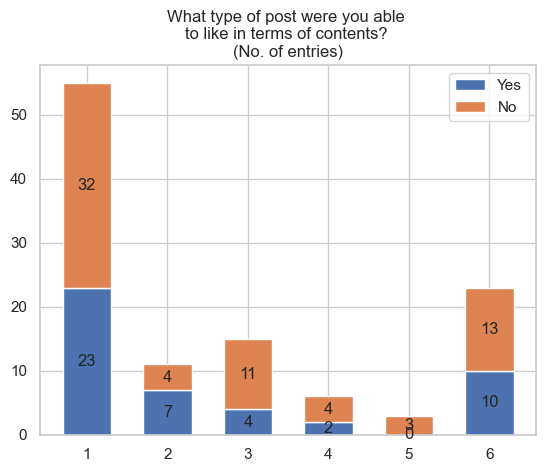

1 YES- 23
2 YES- 7
3 YES- 4
4 YES- 2
5 YES- 0
6 YES- 10
1 NO- 32
2 NO- 4
3 NO- 11
4 NO- 4
5 NO- 3
6 NO- 13


In [2242]:
a = ((data['contents'] == 1)  & (data['conversion1'] >= 1) ).sum() # 1 yes
b = ((data['contents'] == 2)  & (data['conversion1'] >= 1) ).sum() # 2 yes
c = ((data['contents'] == 3)  & (data['conversion1'] >= 1) ).sum() # 3 yes
d = ((data['contents'] == 4)  & (data['conversion1'] >= 1) ).sum() # 4 yes
e = ((data['contents'] == 5)  & (data['conversion1'] >= 1) ).sum() # 5 yes
f = ((data['contents'] == 6)  & (data['conversion1'] >= 1) ).sum() # 6 yes
g = ((data['contents'] == 1)  & (data['conversion1'] < 1) ).sum() # 1 No
h = ((data['contents'] == 2)  & (data['conversion1'] < 1) ).sum() # 2 No
i = ((data['contents'] == 3)  & (data['conversion1'] < 1) ).sum() # 3 No
j = ((data['contents'] == 4)  & (data['conversion1'] < 1) ).sum() # 4 No
k = ((data['contents'] == 5)  & (data['conversion1'] < 1) ).sum() # 5 No
l = ((data['contents'] == 6)  & (data['conversion1'] < 1) ).sum() # 6 No

labels = ['1','2','3','4','5','6']

label1 = {
    'Yes' : np.array([a,b,c,d,e,f]),
    'No' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of contents? \n(No. of entries)')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("6 YES- " + str (f))
print("1 NO- " + str (g))
print("2 NO- " + str (h))
print("3 NO- " + str (i))
print("4 NO- " + str (j))
print("5 NO- " + str (k))
print("6 NO- " + str (l))

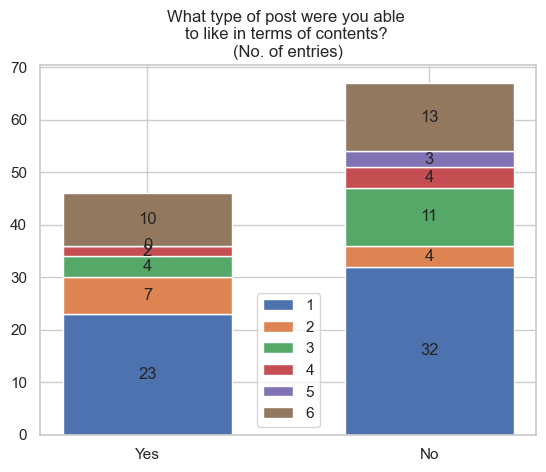

1 YES- 23
2 YES- 7
3 YES- 4
4 YES- 2
5 YES- 0
6 YES- 10
1 NO- 32
2 NO- 4
3 NO- 11
4 NO- 4
5 NO- 3
6 NO- 13


In [2243]:
labels = ['Yes','No']

label1 = {
    '1' : np.array([a,g]),
    '2' : np.array([b,h]),
    '3' : np.array([c,i]),
    '4' : np.array([d,j]),
    '5' : np.array([e,k]),
    '6' : np.array([f,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of contents? \n(No. of entries)')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("6 YES- " + str (f))
print("1 NO- " + str (g))
print("2 NO- " + str (h))
print("3 NO- " + str (i))
print("4 NO- " + str (j))
print("5 NO- " + str (k))
print("6 NO- " + str (l))

In [2244]:
contingency_table = pd.crosstab(cdata1['contents'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between no of visuals contents and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between no of visuals contents and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
contents            
1            32   23
2             4    7
3            11    4
4             4    2
5             3    0
6            13   10

Chi-Square Statistic: 5.917254764158241
P-Value: 0.31435385285125184
Degrees of Freedom: 5
Expected Frequencies:
 [[32.61061947 22.38938053]
 [ 6.52212389  4.47787611]
 [ 8.89380531  6.10619469]
 [ 3.55752212  2.44247788]
 [ 1.77876106  1.22123894]
 [13.63716814  9.36283186]]

H0: There is no significant association between no of visuals contents and conversion
Fail to reject the null hypothesis: No significant association found.


##### What type of post were you able to like in terms of visuals/audio? (multiple entries)

In [2245]:
cdata1['visuals'] = data['visuals']
cdata1['visuals'].nunique()

6

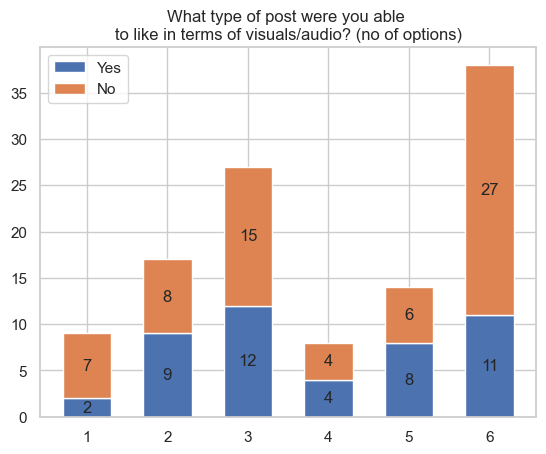

1 YES- 2
2 YES- 9
3 YES- 12
4 YES- 4
5 YES- 8
6 YES- 11
1 NO- 7
2 NO- 8
3 NO- 15
4 NO- 4
5 NO- 6
6 NO- 27


In [2246]:
a = ((data['visuals'] == 1)  & (data['conversion1'] >= 1) ).sum() # 1 yes
b = ((data['visuals'] == 2)  & (data['conversion1'] >= 1) ).sum() # 2 yes
c = ((data['visuals'] == 3)  & (data['conversion1'] >= 1) ).sum() # 3 yes
d = ((data['visuals'] == 4)  & (data['conversion1'] >= 1) ).sum() # 4 yes
e = ((data['visuals'] == 5)  & (data['conversion1'] >= 1) ).sum() # 5 yes
f = ((data['visuals'] == 6)  & (data['conversion1'] >= 1) ).sum() # 6 yes
g = ((data['visuals'] == 1)  & (data['conversion1'] < 1) ).sum() # 1 No
h = ((data['visuals'] == 2)  & (data['conversion1'] < 1) ).sum() # 2 No
i = ((data['visuals'] == 3)  & (data['conversion1'] < 1) ).sum() # 3 No
j = ((data['visuals'] == 4)  & (data['conversion1'] < 1) ).sum() # 4 No
k = ((data['visuals'] == 5)  & (data['conversion1'] < 1) ).sum() # 5 No
l = ((data['visuals'] == 6)  & (data['conversion1'] < 1) ).sum() # 6 No

labels = ['1','2','3','4','5','6']

label1 = {
    'Yes' : np.array([a,b,c,d,e,f]),
    'No' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of visuals/audio? (no of options)')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("6 YES- " + str (f))
print("1 NO- " + str (g))
print("2 NO- " + str (h))
print("3 NO- " + str (i))
print("4 NO- " + str (j))
print("5 NO- " + str (k))
print("6 NO- " + str (l))

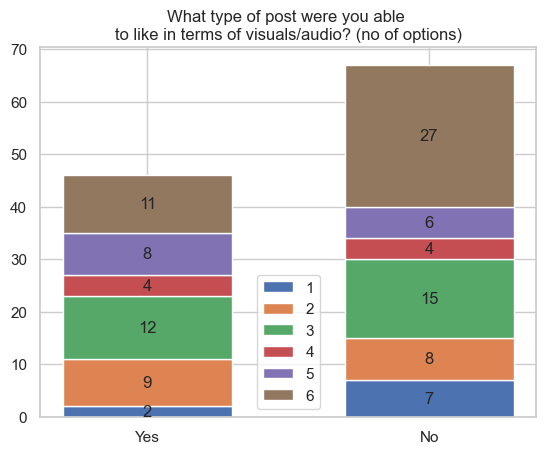

1 YES- 2
2 YES- 9
3 YES- 12
4 YES- 4
5 YES- 8
6 YES- 11
1 NO- 7
2 NO- 8
3 NO- 15
4 NO- 4
5 NO- 6
6 NO- 27


In [2247]:
labels = ['Yes','No']

label1 = {
    '1' : np.array([a,g]),
    '2' : np.array([b,h]),
    '3' : np.array([c,i]),
    '4' : np.array([d,j]),
    '5' : np.array([e,k]),
    '6' : np.array([f,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of visuals/audio? (no of options)')
ax.legend()

plt.show()

print("1 YES- " + str (a))
print("2 YES- " + str (b))
print("3 YES- " + str (c))
print("4 YES- " + str (d))
print("5 YES- " + str (e))
print("6 YES- " + str (f))
print("1 NO- " + str (g))
print("2 NO- " + str (h))
print("3 NO- " + str (i))
print("4 NO- " + str (j))
print("5 NO- " + str (k))
print("6 NO- " + str (l))

In [2248]:
contingency_table = pd.crosstab(cdata1['visuals'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between no of visuals types and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between no of visuals types and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
visuals             
1             7    2
2             8    9
3            15   12
4             4    4
5             6    8
6            27   11

Chi-Square Statistic: 6.5148376039282585
P-Value: 0.25929314331479986
Degrees of Freedom: 5
Expected Frequencies:
 [[ 5.33628319  3.66371681]
 [10.07964602  6.92035398]
 [16.00884956 10.99115044]
 [ 4.74336283  3.25663717]
 [ 8.30088496  5.69911504]
 [22.53097345 15.46902655]]

H0: There is no significant association between no of visuals types and conversion
Fail to reject the null hypothesis: No significant association found.


##### Visit Social Media 
In the past three months, were you able to visit other social media sites/pages related to Family Planning and Reproductive Health? 

In [2249]:
cdata1['social'] = data['social']
cdata1['social'].nunique()

2

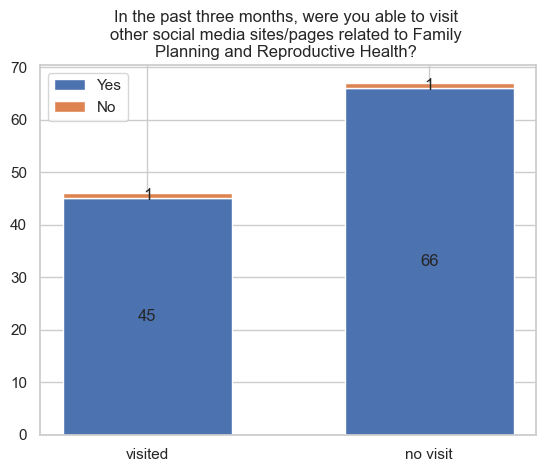

Visited YES- 45
No Visit YES- 1
Visited NO- 66
No Visit NO- 1


In [2250]:
a = ((data['social'] == 1)  & (data['conversion1'] >= 1) ).sum() # visited yes
b = ((data['social'] == 0)  & (data['conversion1'] >= 1) ).sum() # no visit yes
c = ((data['social'] == 1)  & (data['conversion1'] < 1) ).sum() # visited no
d = ((data['social'] == 0)  & (data['conversion1'] < 1) ).sum() # no visit yes


labels = ['visited','no visit']

label1 = {
    'Yes' : np.array([a,c]),
    'No' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('In the past three months, were you able to visit \nother social media sites/pages related to Family \nPlanning and Reproductive Health? ')
ax.legend()

plt.show()

print("Visited YES- " + str (a))
print("No Visit YES- " + str (b))
print("Visited NO- " + str (c))
print("No Visit NO- " + str (d))


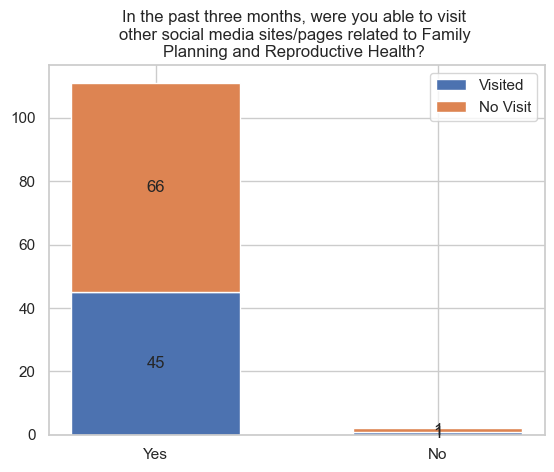

Visited YES- 45
No Visit YES- 1
Visited NO- 66
No Visit NO- 1


In [2251]:
labels = ['Yes','No']

label1 = {
    'Visited' : np.array([a,b]),
    'No Visit' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('In the past three months, were you able to visit \nother social media sites/pages related to Family \nPlanning and Reproductive Health? ')
ax.legend()

plt.show()

print("Visited YES- " + str (a))
print("No Visit YES- " + str (b))
print("Visited NO- " + str (c))
print("No Visit NO- " + str (d))


In [2252]:
contingency_table = pd.crosstab(cdata1['visuals'], cdata1['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between freq of socmed visits and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between freq of socmed visits and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1  No  Yes
visuals             
1             7    2
2             8    9
3            15   12
4             4    4
5             6    8
6            27   11

Chi-Square Statistic: 6.5148376039282585
P-Value: 0.25929314331479986
Degrees of Freedom: 5
Expected Frequencies:
 [[ 5.33628319  3.66371681]
 [10.07964602  6.92035398]
 [16.00884956 10.99115044]
 [ 4.74336283  3.25663717]
 [ 8.30088496  5.69911504]
 [22.53097345 15.46902655]]

H0: There is no significant association between freq of socmed visits and conversion
Fail to reject the null hypothesis: No significant association found.


#### Logistic Model

In [2253]:
print(cdata1.columns.tolist())

['conversion1', 'age', 'job_type', 'educ', 'sex', 'genderid', 'loc', 'devices', 'age_bracket', 'female', 'civil', 'purpose', 'rh_needs', 'benefitnum', 'platforms', 'oftenvisit', 'learnpage', 'contents', 'visuals', 'social']


In [2254]:
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])

temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['genderid'] = label_encoder.fit_transform(cdata1['genderid'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['purpose'] = label_encoder.fit_transform(cdata1['purpose'])

temp['rh_needs'] = label_encoder.fit_transform(cdata1['rh_needs'])
temp['benefitnum'] = label_encoder.fit_transform(cdata1['benefitnum'])
temp['platforms'] = label_encoder.fit_transform(cdata1['platforms'])
temp['oftenvisit'] = label_encoder.fit_transform(cdata1['oftenvisit'])

temp['learnpage'] = label_encoder.fit_transform(cdata1['learnpage'])
temp['contents'] = label_encoder.fit_transform(cdata1['contents'])
temp['visuals'] = label_encoder.fit_transform(cdata1['visuals'])
temp['social'] = label_encoder.fit_transform(cdata1['social'])




X = temp[['age_bracket', 'job_type', 'educ', 
          'female','genderid','civil','purpose',
          'rh_needs','benefitnum','platforms','oftenvisit',
          'learnpage','contents','visuals','social'
          ]]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nFeatures vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.596863
         Iterations 5


Features vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  113
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                           14
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.1168
Time:                        13:18:01   Log-Likelihood:                -67.446
converged:                       True   LL-Null:                       -76.363
Covariance Type:            nonrobust   LLR p-value:                    0.2144
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket     0.0607      0.413      0.147      0.883      -0.748       0.8

###### Analysis
Only 'Civil Status', 'Purpose of the visit', and 'Have you able to visit other social media' features are significant (p<0.5)

#### Type of post

In [2255]:
data = pd.read_csv("cpd2.csv")
print(data.shape)
#print(data.columns)

(650, 49)


In [2256]:
print(data.shape)
data = data.dropna(subset=['Have you visited a facility for family planning consultation/counselling? '])
print(data.shape)
cdata2 = pd.DataFrame()     # Dataframe for conversion 1
cdata2['conversion1_'] = data['Have you visited a facility for family planning consultation/counselling? ']
cdata2['conversion1'] = label_encoder.fit_transform(cdata2['conversion1_'])
cdata2['post_type'] = data['19. What type of post were you able to like in terms of contents? (multiple entries)']

(650, 49)
(518, 49)


In [2257]:
cdata2['post_type'].head()

0    Show family planning options (Nagpapakita ng m...
1    Show method benefits (Nagpapakita ng mga pakin...
2    Correspond to my needs (Tumutugma sa aking mga...
3    Show family planning options (Nagpapakita ng m...
4    Show method benefits (Nagpapakita ng mga pakin...
Name: post_type, dtype: object

In [2258]:
cdata2['post_type'].nunique()
unique_names = cdata2['post_type'].unique()
print("\nUnique Names:\n", unique_names)


Unique Names:
 ['Show family planning options (Nagpapakita ng mga mapagpipilian sa pagpaplano ng pamilya)'
 'Show method benefits (Nagpapakita ng mga pakinabang ng mga pamamaraan), Contain facts and figures (Naglalaman ng mga katotohanan at mga numero)'
 'Correspond to my needs (Tumutugma sa aking mga pangangailangan), Show method benefits (Nagpapakita ng mga pakinabang ng mga pamamaraan), Contain facts and figures (Naglalaman ng mga katotohanan at mga numero)'
 'Show family planning options (Nagpapakita ng mga mapagpipilian sa pagpaplano ng pamilya), Contain facts and figures (Naglalaman ng mga katotohanan at mga numero)'
 'Show method benefits (Nagpapakita ng mga pakinabang ng mga pamamaraan), Show hotlines and facility locations (Nagpapakita ng mga hotline at kinaroroonan ng mga pasilidad), Contain stories and testimonials (Naglalaman ng mga kuwento at mga testimonial)'
 'Show hotlines and facility locations (Nagpapakita ng mga hotline at kinaroroonan ng mga pasilidad)'
 'Correspon

In [2259]:
search_string = 'Show family planning options' # option1
cdata2['option1'] = np.where(cdata2['post_type'].str.contains(search_string, case=False), 1, 0)
search_string = 'Show method benefits' # option2
cdata2['option2'] = np.where(cdata2['post_type'].str.contains(search_string, case=False), 1, 0)
search_string = 'Correspond to my needs' # option3
cdata2['option3'] = np.where(cdata2['post_type'].str.contains(search_string, case=False), 1, 0)
search_string = 'Show hotlines and facility locations' # option4
cdata2['option4'] = np.where(cdata2['post_type'].str.contains(search_string, case=False), 1, 0)
search_string = 'Contain stories and testimonials' # option5
cdata2['option5'] = np.where(cdata2['post_type'].str.contains(search_string, case=False), 1, 0)
search_string = 'Contain facts and figures' # option6
cdata2['option6'] = np.where(cdata2['post_type'].str.contains(search_string, case=False), 1, 0)


print(cdata2.head())


  conversion1_  conversion1  \
0   No (Hindi)            0   
1     Yes (Oo)            1   
2   No (Hindi)            0   
3   No (Hindi)            0   
4   No (Hindi)            0   

                                           post_type  option1  option2  \
0  Show family planning options (Nagpapakita ng m...        1        0   
1  Show method benefits (Nagpapakita ng mga pakin...        0        1   
2  Correspond to my needs (Tumutugma sa aking mga...        0        1   
3  Show family planning options (Nagpapakita ng m...        1        0   
4  Show method benefits (Nagpapakita ng mga pakin...        0        1   

   option3  option4  option5  option6  
0        0        0        0        0  
1        0        0        0        1  
2        1        0        0        1  
3        0        0        0        1  
4        0        1        1        0  


##### Those who answer option 1 (Show family planning options)

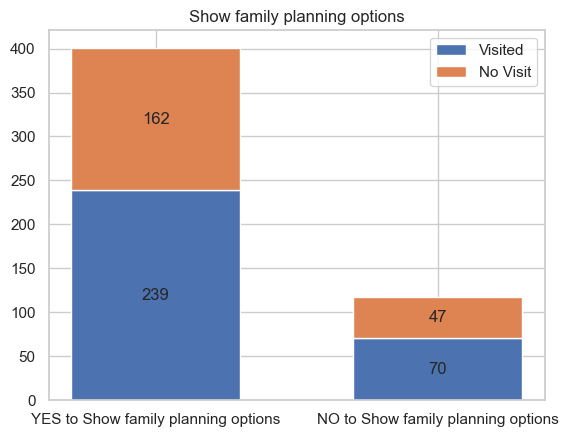

YES to Show family planning options + Visited 239
NO to Show family planning options + Visited 162
YES to Show family planning options + No Visit 70
NO to Show family planning options + No Visit 47


In [2260]:
a = ((cdata2['option1'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # visited yes
b = ((cdata2['option1'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # no visit yes
c = ((cdata2['option1'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # visited no
d = ((cdata2['option1'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # no visit yes


labels = ['YES to Show family planning options','NO to Show family planning options']

label1 = {
    'Visited' : np.array([a,c]),
    'No Visit' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Show family planning options')
ax.legend()

plt.show()

print("YES to Show family planning options + Visited " + str (a))
print("NO to Show family planning options + Visited " + str (b))
print("YES to Show family planning options + No Visit " + str (c))
print("NO to Show family planning options + No Visit " + str (d))

In [2261]:
contingency_table = pd.crosstab(cdata2['option1'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between option1 and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between option1 and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
option1             
0            47  162
1            70  239

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
 [[ 47.20656371 161.79343629]
 [ 69.79343629 239.20656371]]

H0: There is no significant association between option1 and conversion
Fail to reject the null hypothesis: No significant association found.


##### Those who answer option 2 (Show method benefits)

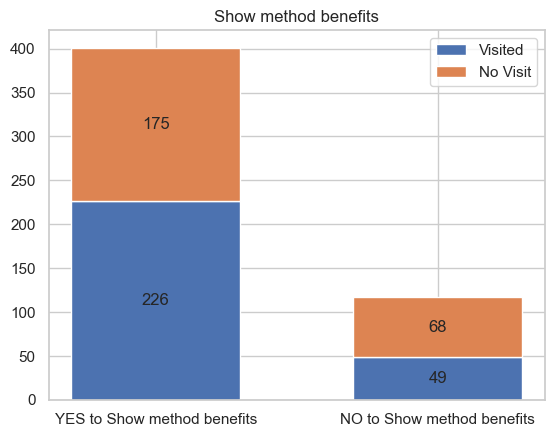

YES to Show method benefits + Visited 226
NO to Show method benefits + Visited 175
YES to Show method benefits + No Visit 49
NO to Show method benefits + No Visit 68


In [2262]:
a = ((cdata2['option2'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # visited yes
b = ((cdata2['option2'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # no visit yes
c = ((cdata2['option2'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # visited no
d = ((cdata2['option2'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # no visit yes


labels = ['YES to Show method benefits','NO to Show method benefits']

label1 = {
    'Visited' : np.array([a,c]),
    'No Visit' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Show method benefits')
ax.legend()

plt.show()

print("YES to Show method benefits + Visited " + str (a))
print("NO to Show method benefits + Visited " + str (b))
print("YES to Show method benefits + No Visit " + str (c))
print("NO to Show method benefits + No Visit " + str (d))

In [2263]:
contingency_table = pd.crosstab(cdata2['option2'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between option2 and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between option2 and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
option2             
0            68  175
1            49  226

Chi-Square Statistic: 7.053729778118801
P-Value: 0.007910037888711328
Degrees of Freedom: 1
Expected Frequencies:
 [[ 54.88610039 188.11389961]
 [ 62.11389961 212.88610039]]

H0: There is no significant association between option2 and conversion
Reject the null hypothesis: There is a significant association between option2 and conversion1.


##### Those who answer option 3 (Correspond to my needs)

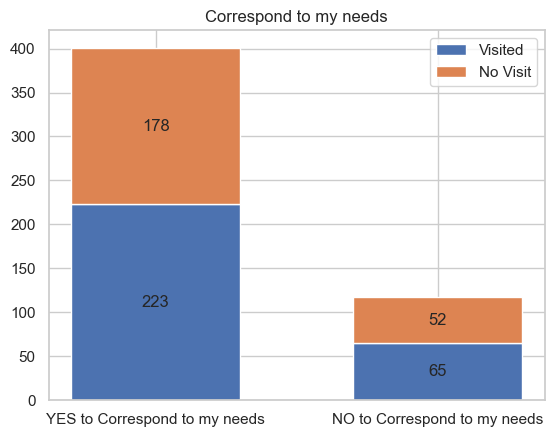

YES to Correspond to my needs + Visited 223
NO to Correspond to my needs + Visited 178
YES to Correspond to my needs + No Visit 65
NO to Correspond to my needs + No Visit 52


In [2264]:
a = ((cdata2['option3'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # visited yes
b = ((cdata2['option3'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # no visit yes
c = ((cdata2['option3'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # visited no
d = ((cdata2['option3'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # no visit yes


labels = ['YES to Correspond to my needs','NO to Correspond to my needs']

label1 = {
    'Visited' : np.array([a,c]),
    'No Visit' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Correspond to my needs')
ax.legend()

plt.show()

print("YES to Correspond to my needs + Visited " + str (a))
print("NO to Correspond to my needs + Visited " + str (b))
print("YES to Correspond to my needs + No Visit " + str (c))
print("NO to Correspond to my needs + No Visit " + str (d))

In [2265]:
contingency_table = pd.crosstab(cdata2['option3'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between option3 and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between option3 and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
option3             
0            52  178
1            65  223

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
 [[ 51.94980695 178.05019305]
 [ 65.05019305 222.94980695]]

H0: There is no significant association between option3 and conversion
Fail to reject the null hypothesis: No significant association found.


##### Those who answer option 4 (Show hotlines and facility locations)

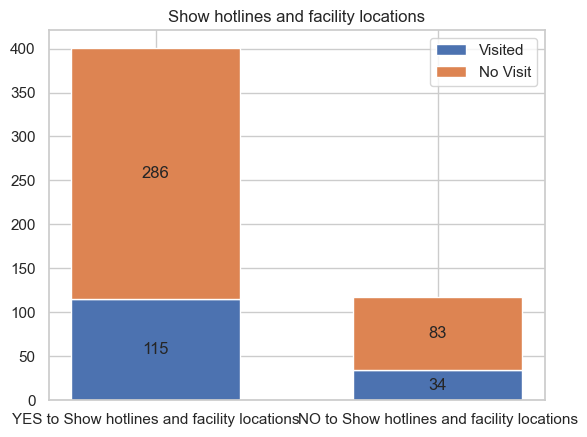

YES to Show hotlines and facility locations + Visited 115
NO to Show hotlines and facility locations + Visited 286
YES to Show hotlines and facility locations + No Visit 34
NO to Show hotlines and facility locations + No Visit 83


In [2266]:
a = ((cdata2['option4'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # visited yes
b = ((cdata2['option4'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # no visit yes
c = ((cdata2['option4'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # visited no
d = ((cdata2['option4'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # no visit yes


labels = ['YES to Show hotlines and facility locations','NO to Show hotlines and facility locations']

label1 = {
    'Visited' : np.array([a,c]),
    'No Visit' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Show hotlines and facility locations')
ax.legend()

plt.show()

print("YES to Show hotlines and facility locations + Visited " + str (a))
print("NO to Show hotlines and facility locations + Visited " + str (b))
print("YES to Show hotlines and facility locations + No Visit " + str (c))
print("NO to Show hotlines and facility locations + No Visit " + str (d))

In [2267]:
contingency_table = pd.crosstab(cdata2['option4'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between option4 and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between option4 and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
option4             
0            83  286
1            34  115

Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
 [[ 83.34555985 285.65444015]
 [ 33.65444015 115.34555985]]

H0: There is no significant association between option4 and conversion
Fail to reject the null hypothesis: No significant association found.


##### Those who answer option 5 (Contain stories and testimonials)

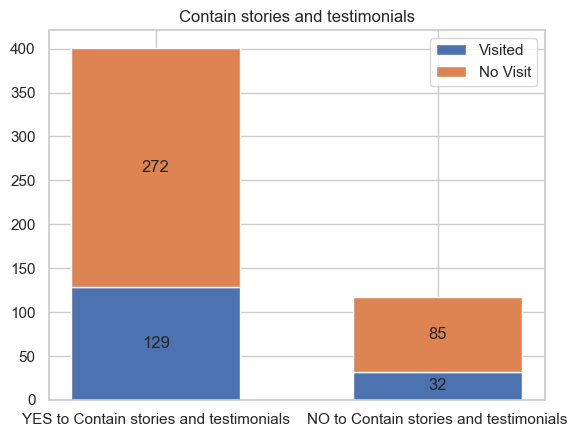

YES to Contain stories and testimonials + Visited 129
NO to Contain stories and testimonials + Visited 272
YES to Contain stories and testimonials + No Visit 32
NO to Contain stories and testimonials + No Visit 85


In [2268]:
a = ((cdata2['option5'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # visited yes
b = ((cdata2['option5'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # no visit yes
c = ((cdata2['option5'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # visited no
d = ((cdata2['option5'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # no visit yes


labels = ['YES to Contain stories and testimonials','NO to Contain stories and testimonials']

label1 = {
    'Visited' : np.array([a,c]),
    'No Visit' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Contain stories and testimonials')
ax.legend()

plt.show()

print("YES to Contain stories and testimonials + Visited " + str (a))
print("NO to Contain stories and testimonials + Visited " + str (b))
print("YES to Contain stories and testimonials + No Visit " + str (c))
print("NO to Contain stories and testimonials + No Visit " + str (d))

In [2269]:
contingency_table = pd.crosstab(cdata2['option5'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between option5 and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between option5 and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
option5             
0            85  272
1            32  129

Chi-Square Statistic: 0.7698986879679648
P-Value: 0.3802483958354943
Degrees of Freedom: 1
Expected Frequencies:
 [[ 80.63513514 276.36486486]
 [ 36.36486486 124.63513514]]

H0: There is no significant association between option5 and conversion
Fail to reject the null hypothesis: No significant association found.


##### Those who answer option 6 (Contain facts and figures)

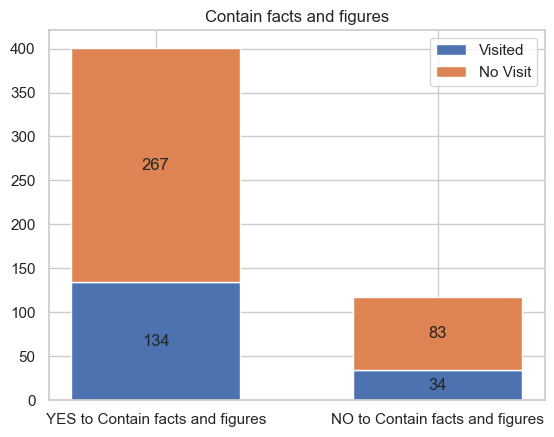

YES to Contain facts and figures + Visited 134
NO to Contain facts and figures + Visited 267
YES to Contain facts and figures + No Visit 34
NO to Contain facts and figures + No Visit 83


In [2270]:
a = ((cdata2['option6'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # visited yes
b = ((cdata2['option6'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # no visit yes
c = ((cdata2['option6'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # visited no
d = ((cdata2['option6'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # no visit yes


labels = ['YES to Contain facts and figures','NO to Contain facts and figures']

label1 = {
    'Visited' : np.array([a,c]),
    'No Visit' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Contain facts and figures')
ax.legend()

plt.show()

print("YES to Contain facts and figures + Visited " + str (a))
print("NO to Contain facts and figures + Visited " + str (b))
print("YES to Contain facts and figures + No Visit " + str (c))
print("NO to Contain facts and figures + No Visit " + str (d))

In [2271]:
contingency_table = pd.crosstab(cdata2['option6'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between option6 and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between option6 and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
option6             
0            83  267
1            34  134

Chi-Square Statistic: 0.5982719483342918
P-Value: 0.43923811666560897
Degrees of Freedom: 1
Expected Frequencies:
 [[ 79.05405405 270.94594595]
 [ 37.94594595 130.05405405]]

H0: There is no significant association between option6 and conversion
Fail to reject the null hypothesis: No significant association found.


##### Analysis

Only option two (Show method benefits) has a direct association whether the respondent visited the health facility.

#### Type of Visual

In [2272]:
cdata2['visual_type_'] = data['20. What type of post were you able to like in terms of visuals/audio? (multiple entries)']
cdata2['visual_type_'].head()

0    Text/caption since I am using limited mobile d...
1                                 Images (Mga larawan)
2                                   Videos (Mga video)
3                                 Images (Mga larawan)
4                                   Videos (Mga video)
Name: visual_type_, dtype: object

In [2273]:
print(cdata2['visual_type_'].nunique())
unique_names = cdata2['visual_type_'].unique()
print("\nUnique Names:\n", unique_names)
cdata2['visual_type'] = label_encoder.fit_transform(cdata2['visual_type_'])

6

Unique Names:
 ['Text/caption since I am using limited mobile data (Teksto dahil limitado ang ginagamit kong mobile data)'
 'Images (Mga larawan)' 'Videos (Mga video)'
 'Real person characters (Mga totoong tao)'
 'Vector characters (Mga nakadrowing na tao)' 'Animations (Mga Animation)']


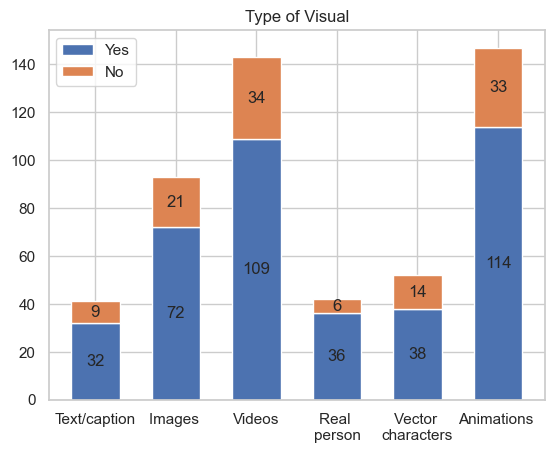

Text/caption / YES- 32
Images / YES- 72
Videos / YES- 109
Real person / YES- 36
Vector characters / YES- 38
Animations / YES- 114
Text/caption / NO- 9
Images / NO- 21
Videos / NO- 34
Real person / NO- 6
Vector characters / NO- 14
Animations / NO- 33


In [2274]:
a = ((cdata2['visual_type'] == 0)  & (cdata2['conversion1'] >= 1) ).sum() # 1 yes
b = ((cdata2['visual_type'] == 1)  & (cdata2['conversion1'] >= 1) ).sum() # 2 yes
c = ((cdata2['visual_type'] == 2)  & (cdata2['conversion1'] >= 1) ).sum() # 3 yes
d = ((cdata2['visual_type'] == 3)  & (cdata2['conversion1'] >= 1) ).sum() # 4 yes
e = ((cdata2['visual_type'] == 4)  & (cdata2['conversion1'] >= 1) ).sum() # 5 yes
f = ((cdata2['visual_type'] == 5)  & (cdata2['conversion1'] >= 1) ).sum() # 6 yes
g = ((cdata2['visual_type'] == 0)  & (cdata2['conversion1'] < 1) ).sum() # 1 No
h = ((cdata2['visual_type'] == 1)  & (cdata2['conversion1'] < 1) ).sum() # 2 No
i = ((cdata2['visual_type'] == 2)  & (cdata2['conversion1'] < 1) ).sum() # 3 No
j = ((cdata2['visual_type'] == 3)  & (cdata2['conversion1'] < 1) ).sum() # 4 No
k = ((cdata2['visual_type'] == 4)  & (cdata2['conversion1'] < 1) ).sum() # 5 No
l = ((cdata2['visual_type'] == 5)  & (cdata2['conversion1'] < 1) ).sum() # 6 No

labels = ['Text/caption','Images ','Videos','Real \nperson','Vector \ncharacters','Animations ']

label1 = {
    'Yes' : np.array([a,b,c,d,e,f]),
    'No' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Type of Visual')
ax.legend()

plt.show()

print("Text/caption / YES- " + str (a))
print("Images / YES- " + str (b))
print("Videos / YES- " + str (c))
print("Real person / YES- " + str (d))
print("Vector characters / YES- " + str (e))
print("Animations / YES- " + str (f))
print("Text/caption / NO- " + str (g))
print("Images / NO- " + str (h))
print("Videos / NO- " + str (i))
print("Real person / NO- " + str (j))
print("Vector characters / NO- " + str (k))
print("Animations / NO- " + str (l))

In [2275]:
contingency_table = pd.crosstab(cdata2['visual_type'], cdata2['conversion1'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between visual_type and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between visual_type and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion1   0    1
visual_type         
0             9   32
1            21   72
2            34  109
3             6   36
4            14   38
5            33  114

Chi-Square Statistic: 2.3411638679602644
P-Value: 0.8002025165155984
Degrees of Freedom: 5
Expected Frequencies:
 [[  9.26061776  31.73938224]
 [ 21.00579151  71.99420849]
 [ 32.2992278  110.7007722 ]
 [  9.48648649  32.51351351]
 [ 11.74517375  40.25482625]
 [ 33.2027027  113.7972973 ]]

H0: There is no significant association between visual_type and conversion
Fail to reject the null hypothesis: No significant association found.


##### Analysis

There is no significant relationship with the type of visual to the probability of a RH facilty visit